<center><h1>Class Challenge #2</h1></center>
<table width="100%">
    <tr>
        <td><img src="../images/img0.jpg" /></td>
    </tr>
</table>

In [1]:
library("ggplot2", quietly = TRUE)
library("dplyr", quietly = TRUE)
library("knitr", quietly = TRUE)
library("stringr", quietly = TRUE)
library("tidyr", quietly = TRUE)
library("plotly", quietly = TRUE)
library("ggthemes", quietly = TRUE)
library("hrbrthemes", quietly = TRUE)
library("gcookbook", quietly = TRUE)
library("tidyverse", quietly = TRUE)
library("scales", quietly = TRUE)
library("reshape2", quietly = TRUE)
library(viridis)
library(spData)
library(sf)
library(ggrepel)

options(warn=-1)
# options(warn=0)



Caricamento pacchetto: 'dplyr'


I seguenti oggetti sono mascherati da 'package:stats':

    filter, lag


I seguenti oggetti sono mascherati da 'package:base':

    intersect, setdiff, setequal, union



Caricamento pacchetto: 'plotly'


Il seguente oggetto `e mascherato da 'package:ggplot2':

    last_plot


Il seguente oggetto `e mascherato da 'package:stats':

    filter


Il seguente oggetto `e mascherato da 'package:graphics':

    layout


NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow


Caricamento pacchetto: 'gcookbook'


Il seguente oggetto `e mascherato da 'package:plotly':

    wind


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0     v readr     2.1.5
v lubridate 1.9.3     v tibble    3.2.1
v purrr     1.0.2     


# <font color=red>Aerial Bombing Operations in World War II</font>

## <font color=red>Content</font>
### This dataset consists of digitized paper mission reports from WWII. Each record includes the date, conflict, geographic location, and other data elements to form a live-action sequence of air warfare from 1939 to 1945. The records include U.S. and Royal Air Force data, in addition to some Australian, New Zealand and South African air force missions.

## <font color=red>Acknowledgements</font>
### Lt Col Jenns Robertson of the US Air Force developed the Theater History of Operations Reports (THOR) and posted them online after receiving Department of Defense approval.

### <font color=red>The exercise consists of seven questions, each involving creating a different type of plot and applying inference to address a question related to the challenge.</font>

In [2]:
#setwd('/Users/guillemmirabentrubinat/Library/CloudStorage/OneDrive-Personal/BSE/Data Visualization/homeworks/HW-1')
air_operations <- read.csv(file="./data/operations.csv", stringsAsFactors = F)
colnames(air_operations)
air_operations
print(dim(air_operations))

[1] "Mission.ID"                           
 [2] "Mission.Date"                         
 [3] "Theater.of.Operations"                
 [4] "Country"                              
 [5] "Air.Force"                            
 [6] "Unit.ID"                              
 [7] "Aircraft.Series"                      
 [8] "Callsign"                             
 [9] "Mission.Type"                         
[10] "Takeoff.Base"                         
[11] "Takeoff.Location"                     
[12] "Takeoff.Latitude"                     
[13] "Takeoff.Longitude"                    
[14] "Target.ID"                            
[15] "Target.Country"                       
[16] "Target.City"                          
[17] "Target.Type"                          
[18] "Target.Industry"                      
[19] "Target.Priority"                      
[20] "Target.Latitude"                      
[21] "Target.Longitude"                     
[22] "Altitude..Hundreds.of.Feet."          
[23] "Airborne.Aircraft"                    
[24] "Attacking.Aircraft"                   
[25] "Bombing.Aircraft"                     
[26] "Aircraft.Returned"                    
[27] "Aircraft.Failed"                      
[28] "Aircraft.Damaged"                     
[29] "Aircraft.Lost"                        
[30] "High.Explosives"                      
[31] "High.Explosives.Type"                 
[32] "High.Explosives.Weight..Pounds."      
[33] "High.Explosives.Weight..Tons."        
[34] "Incendiary.Devices"                   
[35] "Incendiary.Devices.Type"              
[36] "Incendiary.Devices.Weight..Pounds."   
[37] "Incendiary.Devices.Weight..Tons."     
[38] "Fragmentation.Devices"                
[39] "Fragmentation.Devices.Type"           
[40] "Fragmentation.Devices.Weight..Pounds."
[41] "Fragmentation.Devices.Weight..Tons."  
[42] "Total.Weight..Pounds."                
[43] "Total.Weight..Tons."                  
[44] "Time.Over.Target"                     
[45] "Bomb.Damage.Assessment"               
[46] "Source.ID"

Mission.ID,Mission.Date,Theater.of.Operations,Country,Air.Force,Unit.ID,Aircraft.Series,Callsign,Mission.Type,Takeoff.Base,...,Incendiary.Devices.Weight..Tons.,Fragmentation.Devices,Fragmentation.Devices.Type,Fragmentation.Devices.Weight..Pounds.,Fragmentation.Devices.Weight..Tons.,Total.Weight..Pounds.,Total.Weight..Tons.,Time.Over.Target,Bomb.Damage.Assessment,Source.ID
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,,,PONTE OLIVO AIRFIELD,...,NA,NA,,NA,NA,NA,10.0,,,NA
2,8/15/1943,PTO,USA,5 AF,400 BS,B24,,1,,...,NA,NA,,NA,NA,NA,20.0,,,9366
3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,,,PONTE OLIVO AIRFIELD,...,NA,NA,,NA,NA,NA,9.0,,,NA
4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,,,PONTE OLIVO AIRFIELD,...,NA,NA,,NA,NA,NA,7.5,,,NA
5,8/15/1943,PTO,USA,5 AF,321 BS,B24,,1,,...,NA,NA,,NA,NA,NA,8.0,,,22585
6,8/15/1943,PTO,USA,5 AF,319 BS,B24,,1,,...,NA,NA,,NA,NA,NA,4.0,,,9349
7,8/15/1943,PTO,USA,5 AF,400 BS,B24,,12,,...,NA,NA,,NA,NA,NA,1.0,,,11287
8,8/15/1943,PTO,USA,5 AF,65 BS,B17,,1,,...,NA,NA,,NA,NA,NA,2.0,,,11326
9,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,,,PONTE OLIVO AIRFIELD,...,NA,NA,,NA,NA,NA,0.0,,,NA


[1] 178281     46


In [3]:
air_operations$Theater.of.Operations <- ifelse(air_operations$Theater.of.Operations == "","NA",str_trim(air_operations$Theater.of.Operations))

# Lookup table for theater names
lut <- c("MTO" = "Mediterranean Theater","PTO" = "Pacific Theater", "ETO" = "European Theater","CBI" = "China Burma India","EAST AFRICA" = "East Africa","MADAGASCAR" = "Madagascar","NA" = "Unknown")

air_operations$Theater.of.Operations.Name <- lut[air_operations$Theater.of.Operations]

# Extract Year and Month
air_operations$Mission.Date.Month <- format(as.Date(air_operations$Mission.Date, format="%m/%d/%Y"),"%m")
air_operations$Mission.Date.Year_Month <- format(as.Date(air_operations$Mission.Date, format="%m/%d/%Y"),"%Y-%m")
air_operations$Mission.Date.Year <- format(as.Date(air_operations$Mission.Date, format="%m/%d/%Y"),"%Y")

# Format target country and city 
air_operations$Target.Country <- str_to_title(air_operations$Target.Country)
air_operations$Target.City <- str_to_title(air_operations$Target.City)

airops = air_operations

head(airops)

print(sum(airops$Theater.of.Operations == "NA"))

,Mission.ID,Mission.Date,Theater.of.Operations,Country,Air.Force,Unit.ID,Aircraft.Series,Callsign,Mission.Type,Takeoff.Base,...,Fragmentation.Devices.Weight..Tons.,Total.Weight..Pounds.,Total.Weight..Tons.,Time.Over.Target,Bomb.Damage.Assessment,Source.ID,Theater.of.Operations.Name,Mission.Date.Month,Mission.Date.Year_Month,Mission.Date.Year
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,,,PONTE OLIVO AIRFIELD,...,NA,NA,10.0,,,NA,Mediterranean Theater,08,1943-08,1943
2,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,,1,,...,NA,NA,20.0,,,9366,Pacific Theater,08,1943-08,1943
3,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,,,PONTE OLIVO AIRFIELD,...,NA,NA,9.0,,,NA,Mediterranean Theater,08,1943-08,1943
4,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,,,PONTE OLIVO AIRFIELD,...,NA,NA,7.5,,,NA,Mediterranean Theater,08,1943-08,1943
5,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,,1,,...,NA,NA,8.0,,,22585,Pacific Theater,08,1943-08,1943
6,6,8/15/1943,PTO,USA,5 AF,319 BS,B24,,1,,...,NA,NA,4.0,,,9349,Pacific Theater,08,1943-08,1943


[1] 3158


In [4]:
airops_theaters = airops %>%
    group_by(Theater.of.Operations.Name) %>%
    summarise(UniqueValues = list(unique(Target.Country)))

airops_theaters$UniqueValues

#airops[, c('Target.Country', "Theater.of.Operations.Name")]

[[1]]
[1] "Burma"                      "China"                     
[3] "India"                      "China Mining"              
[5] "Thailand Or Siam"           "Andaman Islands"           
[7] "Indian Ocean"               "French Indo China"         
[9] "Formosa And Ryukyu Islands"

[[2]]
[1] ""                  "Sudan"             "Ethiopia/Absinnya"
[4] "Somalia"          

[[3]]
 [1] "Germany"                "Holland Or Netherlands" "France"                
 [4] "Austria"                "Belgium"                "Switzerland"           
 [7] "Albania"                "Luxembourg"             "Poland"                
[10] "Norway"                 "Czechoslovakia"         "Bulgaria"              
[13] "Denmark"                "Great Britain"         

[[4]]
[1] "Madagascar"

[[5]]
 [1] "Italy"              "Greece"             "Hungary"           
 [4] "Yugoslavia"         "Romania"            "Algeria"           
 [7] "Crete"              "Sardinia"           "Corsica"           
[10] "Libya"              "Eritrea"            "Ethiopia"          
[13] "Sicily"             "Tunisia"            "Cyprus"            
[16] "Turkey"             "Egypt"              "French West Africa"
[19] "Pantellaria"        "Morocco"           

[[6]]
 [1] "New Guinea"                         "Sumatra"                           
 [3] "Coral Sea Area"                     "Solomon Islands"                   
 [5] "Borneo"                             "Caroline Islands"                  
 [7] "Kurile Islands"                     "Celebes Islands"                   
 [9] "Marianas Islands"                   "Bismark Archipelago"               
[11] "Manchuria"                          "Java"                              
[13] "Volcano And Bonin Islands"          "Philippine Islands"                
[15] "Japan"                              "Aleutian Islands"                  
[17] ""                                   "Formosa And Ryukyu Islands"        
[19] "New Ireland"                        "Marcus Islands"                    
[21] "French Indo China"                  "Marshall Islands"                  
[23] "Palau Islands"                      "Malay States"                      
[25] "Gilbert Islands"                    "Malay States Mining"               
[27] "Sumatra Mining"                     "Formosa"                           
[29] "Korea Or Chosen"                    "Thailand Or Siam"                  
[31] "Wake Island"                        "Japan Mining"                      
[33] "Bougainville"                       "French Indo China Mining"          
[35] "Unknown"                            "China"                             
[37] "Burma"                              "Netherlands East Indies"           
[39] "Indonesia"                          "Bali"                              
[41] "Timor"                              "Australia"                         
[43] "\"Papua New Guinea, Manus Island\"" "Korea Or Chosen Mining"            
[45] "Thailand Or Siam Mining"           

[[7]]
[1] "Unknown Or Not Indicated" ""                        
[3] "Italy"                    "Madagascar"              
[5] "Iraq"                     "Lebanon"                 
[7] "Syria"

In [5]:
unknown_ops = airops[airops$Theater.of.Operations == "NA",]
#print(unknown_ops)
print(dim(unknown_ops))

unique(sort(airops$Mission.Date.Year))

[1] 3158   50


[1] "1939" "1940" "1941" "1942" "1943" "1944" "1945"

In [6]:
# I created the palette on coolors.co and then I used the colorblind filter to check if it was 
# colorblind friendly. For most color blindness types, the palette is completely fine.
# The only exception is monochromacy, for which the palette might pose some difficulties. But it is VERY
# difficullt to account for monochromacy (not even viridis does). Additionally, it is a very rare condition.
#Guillems_accessible_palette = c("#9B2915", "#FFA69E", "#FFE66D", "#033F63", "#80A4ED", "#4B4D68", "#71B48D")
Guillems_accessible_palette = c("#9B2915", "#FFA69E", "#68D8D6", "#033F63", "#80A4ED", "#4B4D68", "#71B48D")
Guillems_accessible_palette_2 = c("#80A4ED", "#4B4D68", "#FFA69E", "#D55E00", "#0072B2", "#E69F00", "#CC79A7", "#999999", "#9B2915", "#033F63", "#fff494", "#68D8D6")

### <font color=red>1. What is the distribution of the aerial bombing operations conducted in the major Theaters, e.g., European (ETO), Pacific (PTO), Mediterranean (MTO), etc. from 1939 to 1945? What are the key insights that you derive from this visualisation?</font>

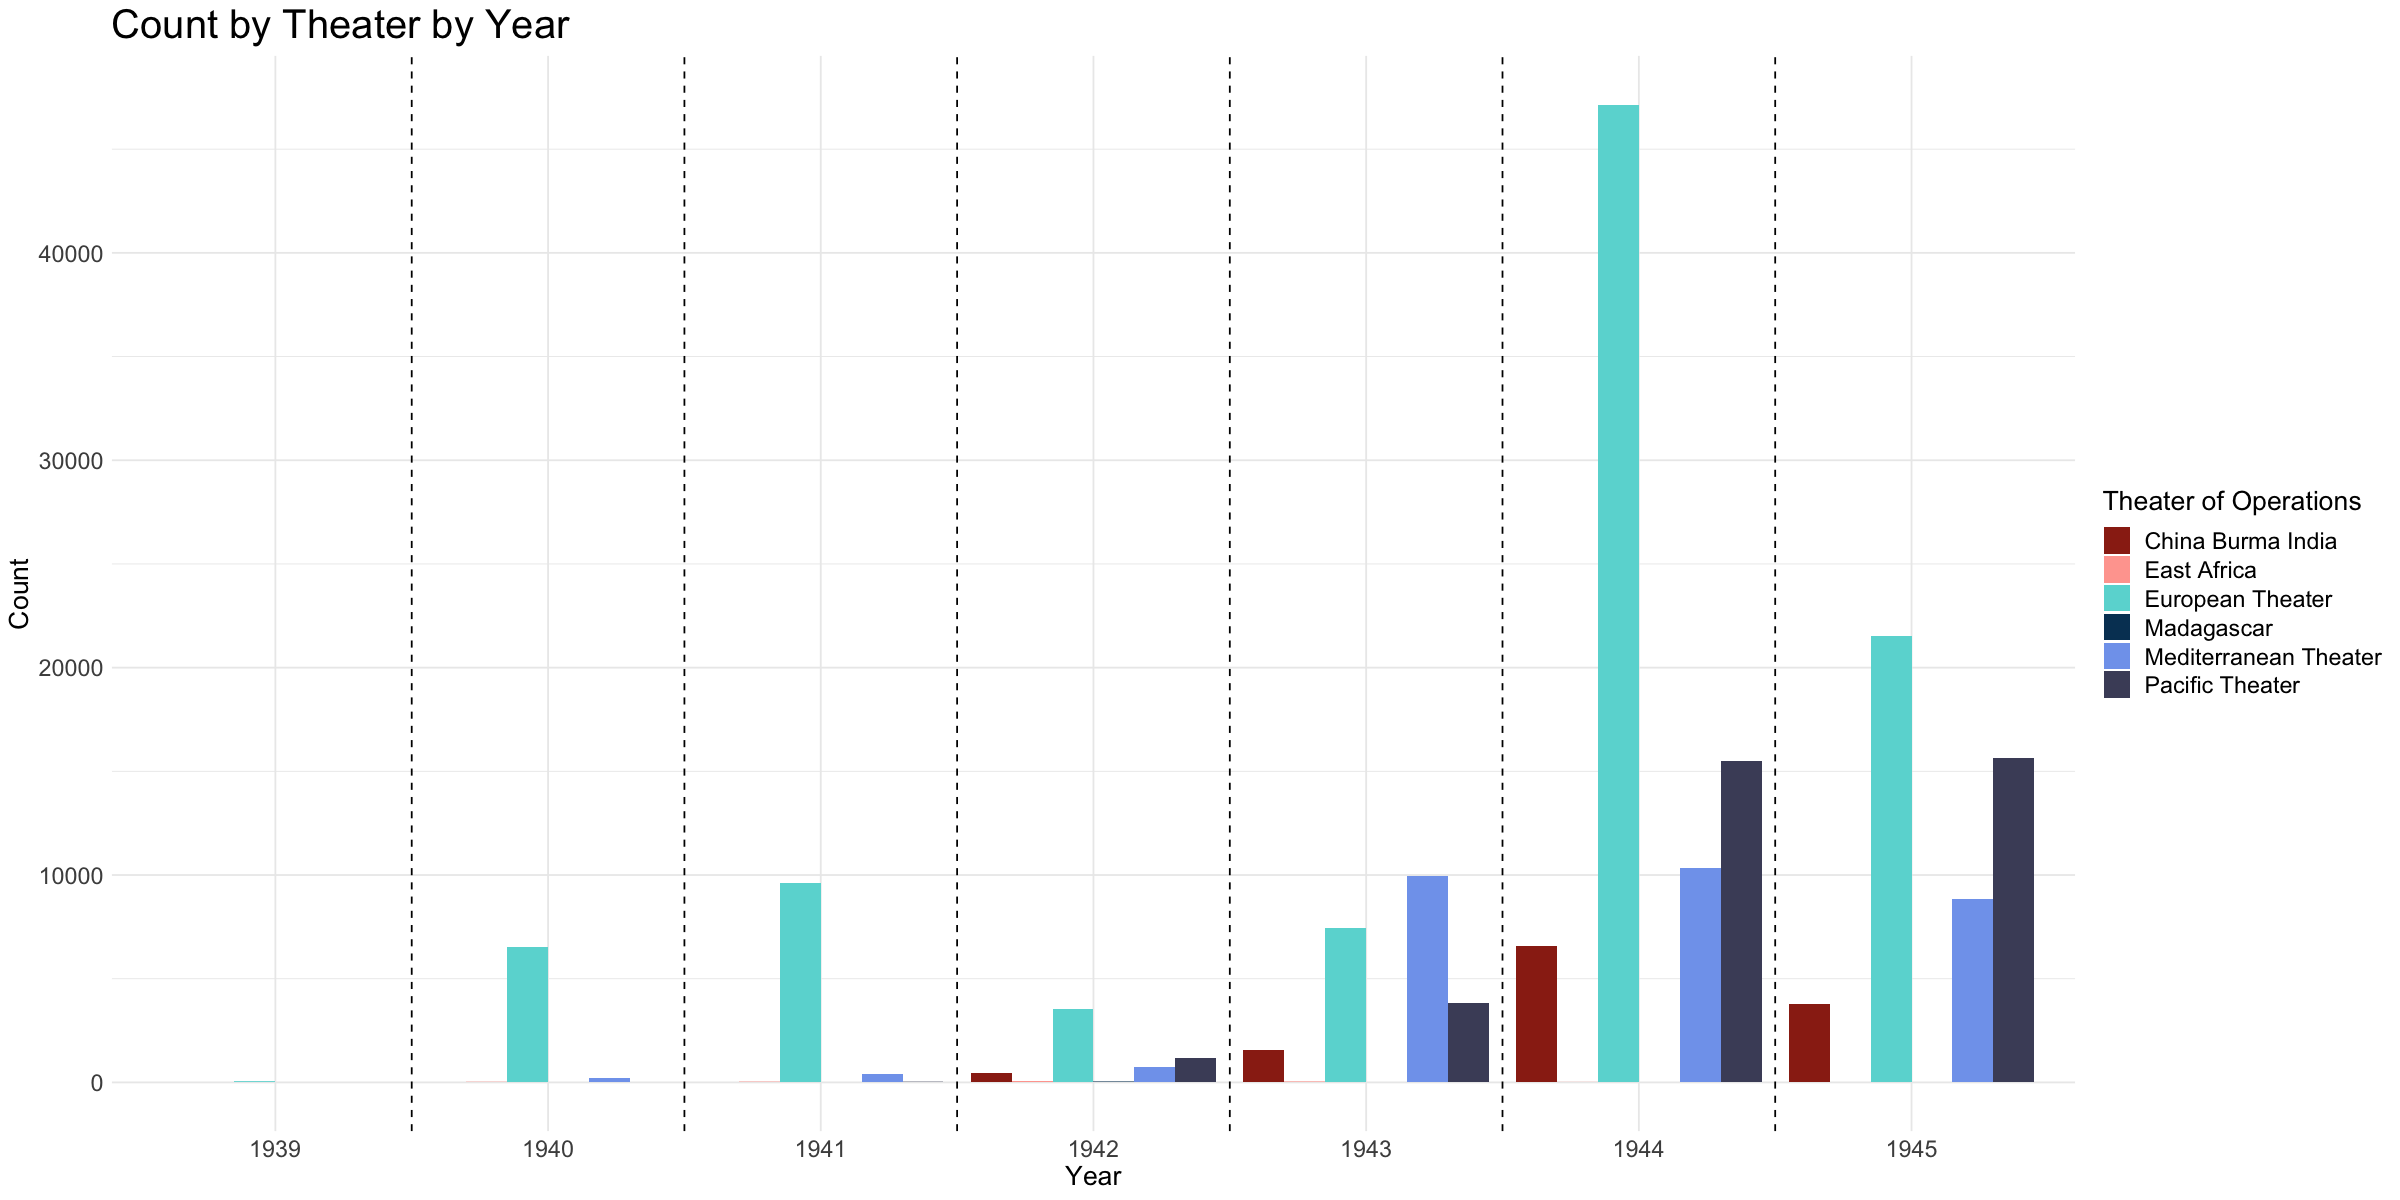

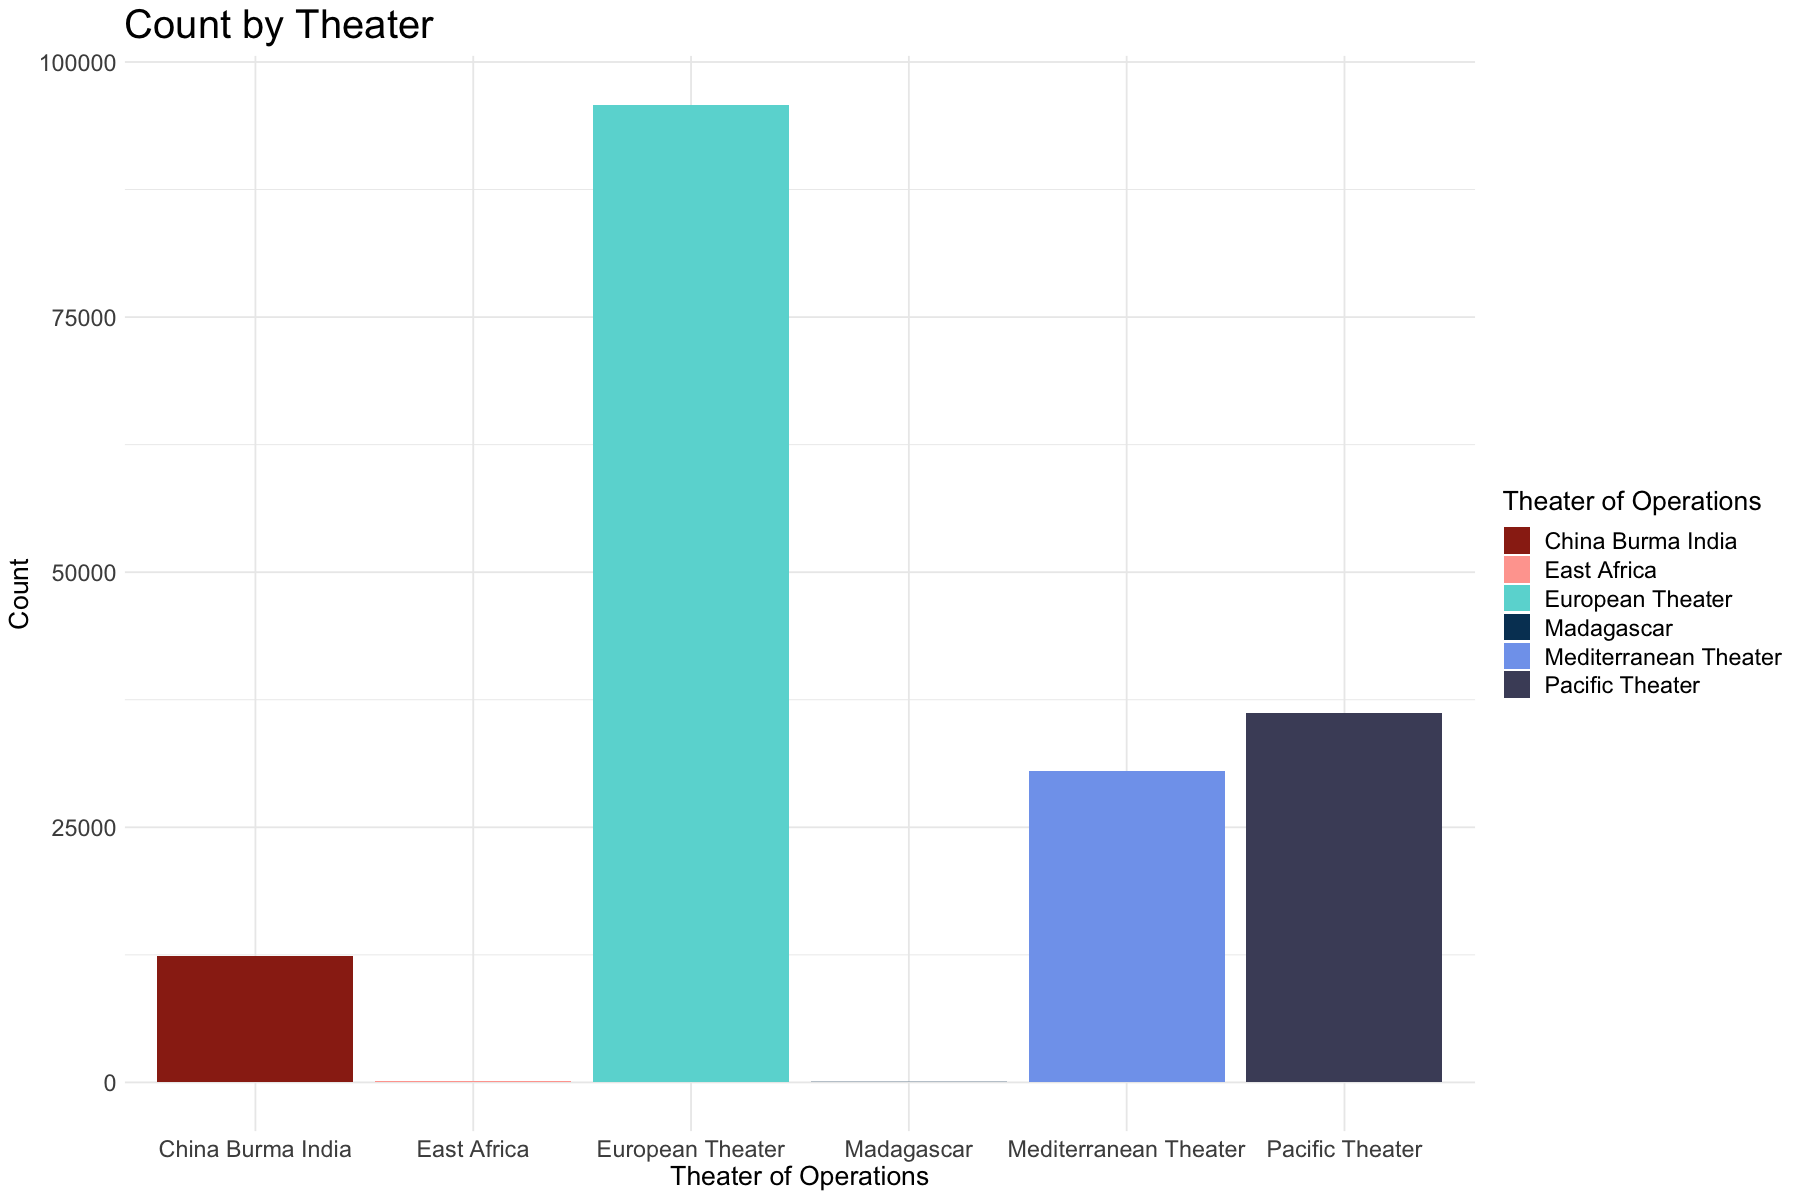

In [7]:
ops_count = airops %>%
    group_by(Theater.of.Operations.Name, Mission.Date.Year) %>%
    count() %>%
    ungroup() %>%
    complete(Theater.of.Operations.Name, Mission.Date.Year, fill = list(n = 0)) %>%
    filter(Theater.of.Operations.Name != "Unknown")

ops_count_joint = airops %>%
    group_by(Theater.of.Operations.Name) %>%
    count() %>%
    ungroup() %>%
    complete(Theater.of.Operations.Name, fill = list(n = 0)) %>%
    filter(Theater.of.Operations.Name != "Unknown")
#print(ops_count)

options(repr.plot.width = 20, repr.plot.height = 10)
ggplot(ops_count, aes(x = Mission.Date.Year, y = n, fill = Theater.of.Operations.Name)) + 
    geom_bar(stat = 'identity', position = 'dodge')+
    scale_fill_manual(values = Guillems_accessible_palette) +
    labs(y = "Count", x = "Year", fill = "Theater of Operations", title = "Count by Theater by Year") +
    geom_vline(xintercept = c(1.5, 2.5, 3.5, 4.5, 5.5, 6.5), linetype = "dashed") +
    theme_minimal() +
    theme(
        plot.title = element_text(size = 24),  
        axis.title = element_text(size = 16),  
        axis.text = element_text(size = 14),   
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14)  
    )

options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(ops_count_joint, aes(x = Theater.of.Operations.Name, y = n, fill = Theater.of.Operations.Name)) + 
    geom_bar(stat = 'identity') +
    scale_fill_manual(values = Guillems_accessible_palette) +
    theme_minimal() +
    labs(y = "Count", x = "Theater of Operations", fill = "Theater of Operations", title = "Count by Theater") +
    theme(
        plot.title = element_text(size = 24),  
        axis.title = element_text(size = 16),  
        axis.text = element_text(size = 14),   
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14)  
    )

We can observe how most of the bombardments were in the European Theater, as it is logical from the fact that most of the data comes from the US and UK air forces. As a result, they mostly bombarded European countries because most of the war was against the Axis countries. We can also assess that most of the destruction must have happened in Europe (at least as far as Allied bombardments from the powers of the West are concerned). The fact that Japan is in the Pacific Theater and Italy is in the Mediterranean Theater are also consistent with the reality of the WWII.

From the first plot we can extract additional information, as we see a general trend towards more operations in 1944 and 1945, but specially for 1944. This could mean that it was the year where the main Allied effort was exerted to overcome the Axis forces. The increase in operations is specially remarkable in the European Theater, which is consistent with an effort against the Nazi Germany specifically.

We can also observe that during 1944-1945 the amount of operations in the Pacific Theater also increased, which is consistent with an increased war effort on all fronts, including against Japan.

In general, we can conclude that in year 1944 the amount of bombardments increased and was kept relevant until the end of the war on the September of 1945.

### <font color=red>2. Show a summary of a percentage of the total aerial bombing operations by Theater of operations by means of a bar chart. Which are the three Theaters where the most aerial bombing operations occured?</font>

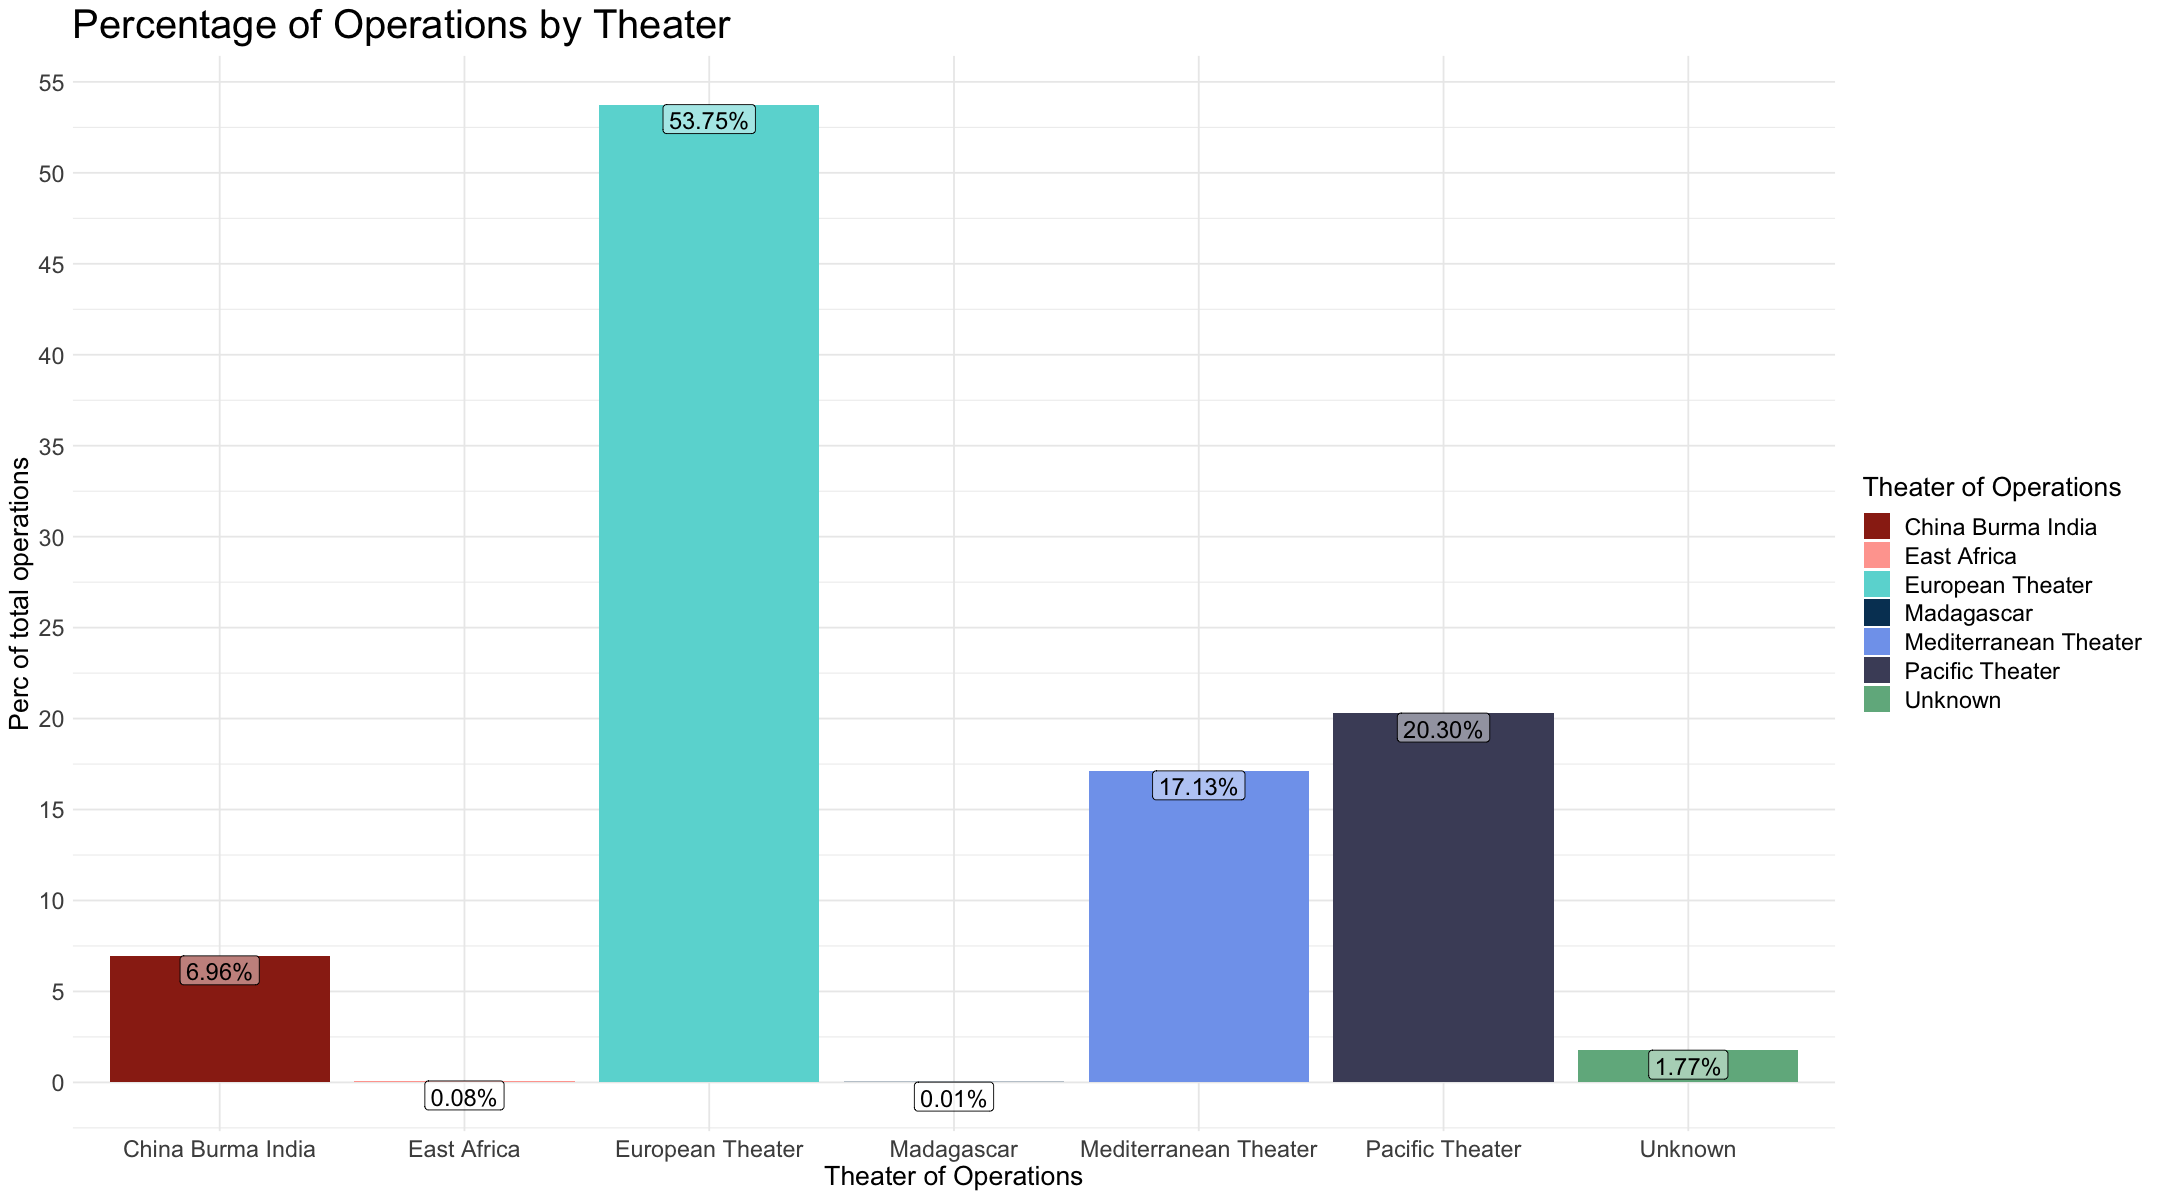

In [8]:
ops_count_joint = airops %>%
    group_by(Theater.of.Operations.Name) %>%
    summarise(perc_ops = (n() / nrow(airops)) * 100) %>%
    ungroup() %>% 
    complete(Theater.of.Operations.Name, fill = list(n = 0))


options(repr.plot.width = 18, repr.plot.height = 10)
ggplot(ops_count_joint, aes(Theater.of.Operations.Name, y = perc_ops, group = Theater.of.Operations.Name, fill = Theater.of.Operations.Name)) + 
    geom_bar(stat = 'identity')+
    scale_fill_manual(values = Guillems_accessible_palette) +
    theme_minimal() +
    geom_label(aes(label = sprintf("%.2f%%", perc_ops)),
                size = 5, vjust = 1, fill = '#ffffff71') +
    labs(y = "Perc of total operations", x = "Theater of Operations", fill = "Theater of Operations", title = "Percentage of Operations by Theater") +
    theme(
        plot.title = element_text(size = 24),  
        axis.title = element_text(size = 16),  
        axis.text = element_text(size = 14),   
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14)  
    ) +
    scale_y_continuous(breaks = seq(0, 60, by = 5))

As advanced previously, the Theaters that received the most bombardments were the European, the Pacific and the Mediterranean ones, in that order. Even if all of the Unknown values were assigned to the CBI Theater, these 3 would remain the most bombarded theaters.

### <font color=red>3. Plot a summary of the total aerial bombing operations by target countries.</font>

In [9]:
world_data = map_data("world")
head(world_data)

,long,lat,group,order,region,subregion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,-69.89912,12.45200,1,1,Aruba,NA
2,-69.89571,12.42300,1,2,Aruba,NA
3,-69.94219,12.43853,1,3,Aruba,NA
4,-70.00415,12.50049,1,4,Aruba,NA
5,-70.06612,12.54697,1,5,Aruba,NA
6,-70.05088,12.59707,1,6,Aruba,NA


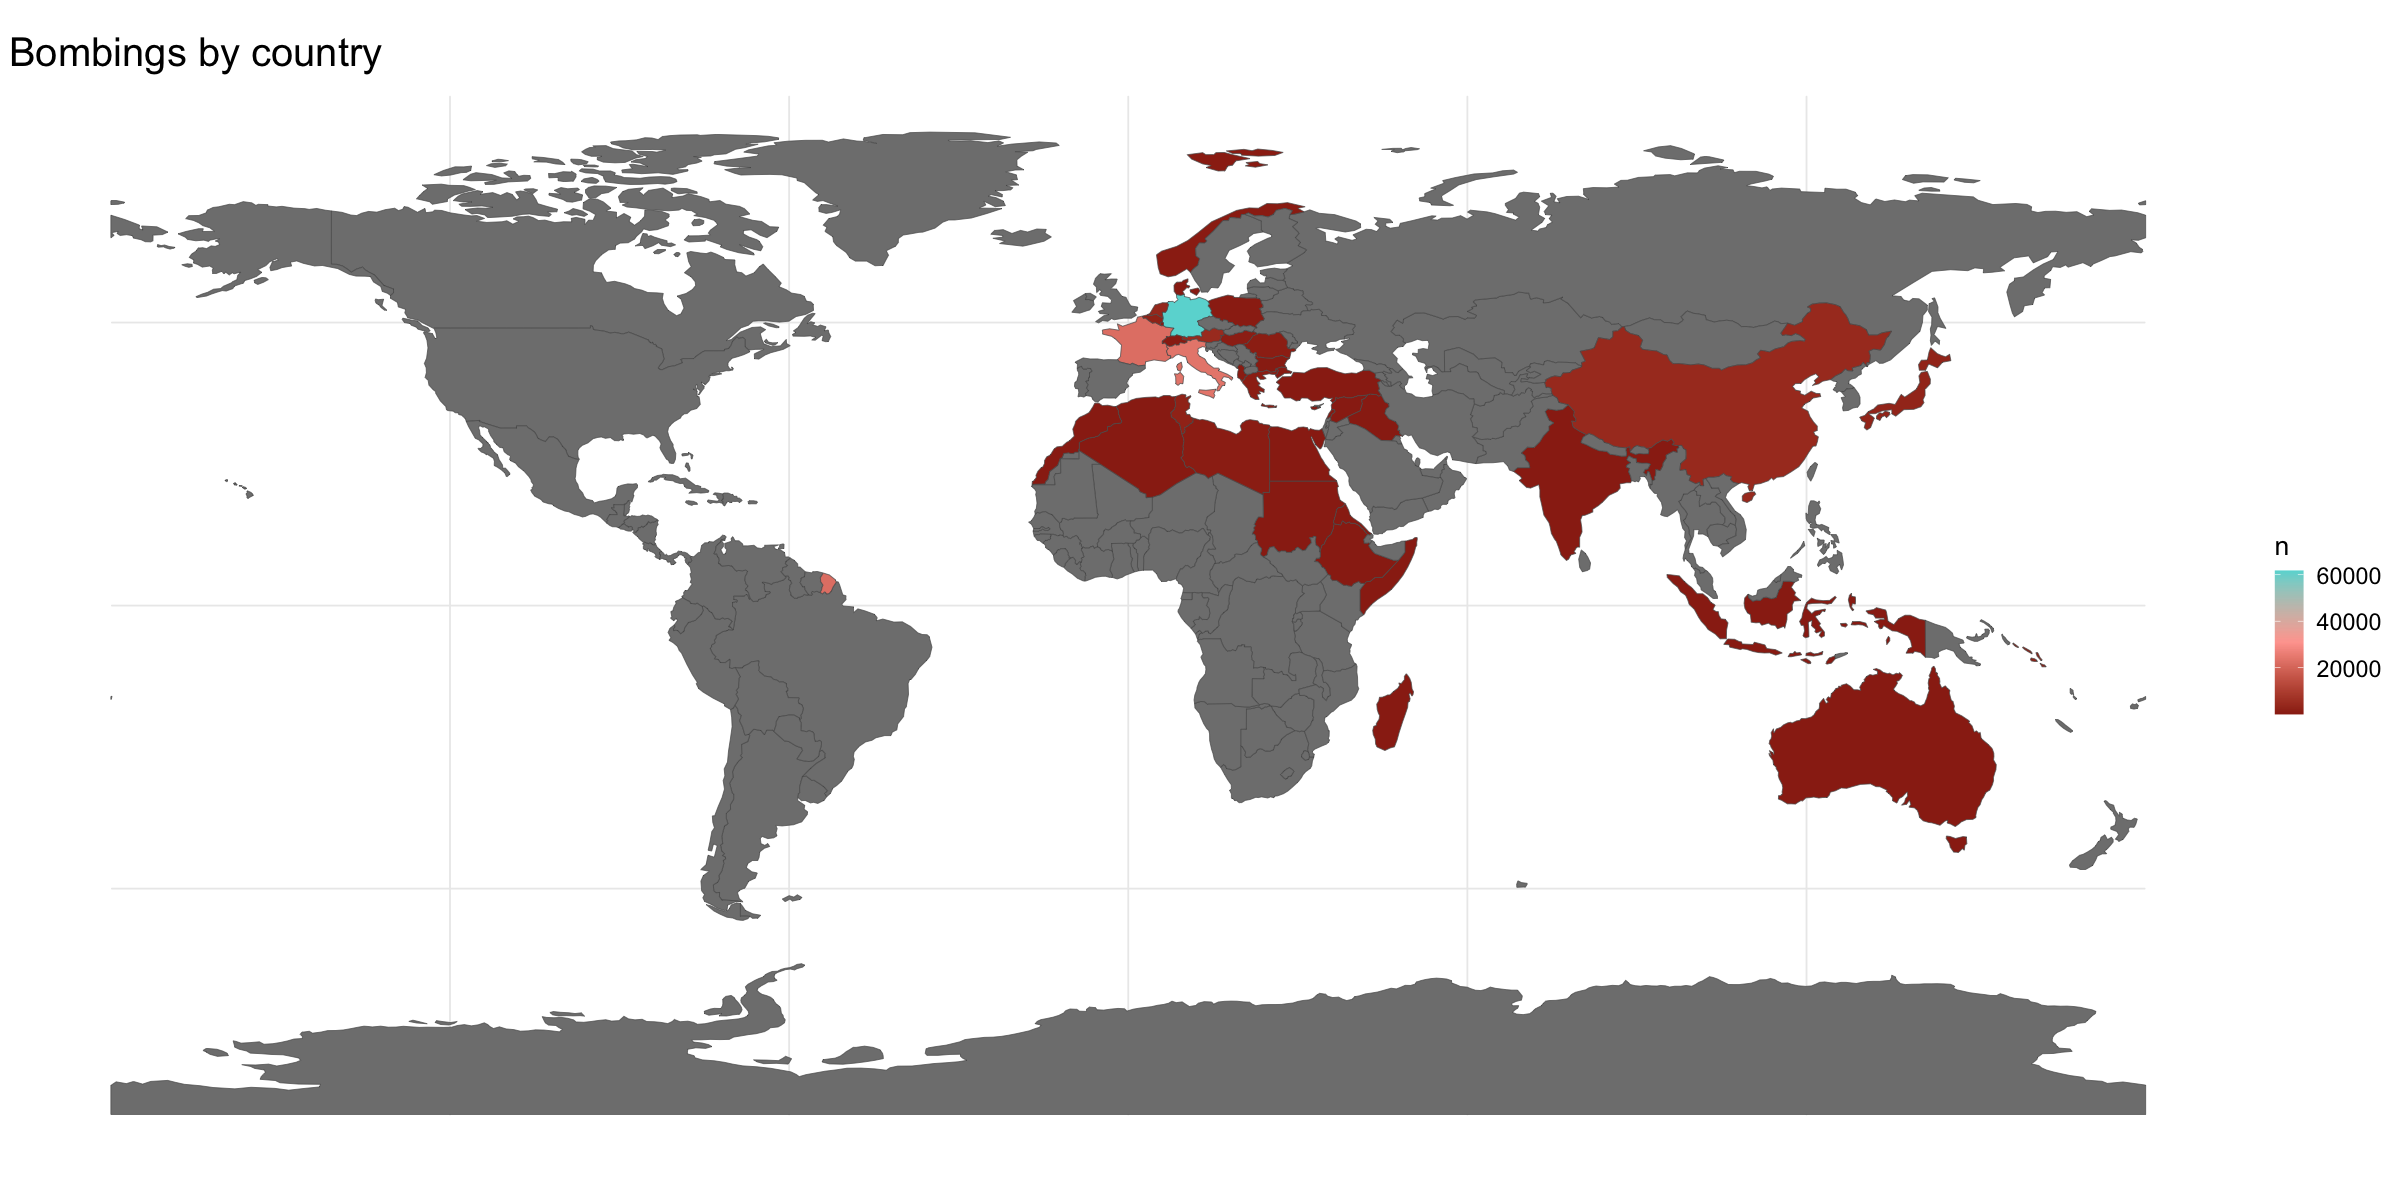

In [10]:
country_ops = airops %>%
    group_by(Target.Country) %>%
    count()

world_map = world %>%
    mutate(across('name_long', str_replace, 'Netherlands', 'Holland Or Netherlands'))

#print(world_map)

world_ops = world_map %>%
    left_join(country_ops, by = c('name_long' = 'Target.Country'))

options(repr.plot.width = 20, repr.plot.height = 10)
ggplot(world_ops) +
    geom_sf(aes(fill = n)) +
    scale_fill_gradientn(colours = Guillems_accessible_palette[1:3]) +
    theme_minimal() +
    theme(
        plot.title = element_text(size = 24),  
        axis.title = element_text(size = 16),  
        axis.text = element_text(size = 14),   
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14)  
    ) +
    labs(title = "Bombings by country")

### <font color=red>4. Is there a relationship between the number of tons of explosives dropped and the number of planes involved in a mission?</font>

[1] 0.5788318


`geom_smooth()` using formula = 'y ~ x'


[1] 0.4194693


`geom_smooth()` using formula = 'y ~ x'


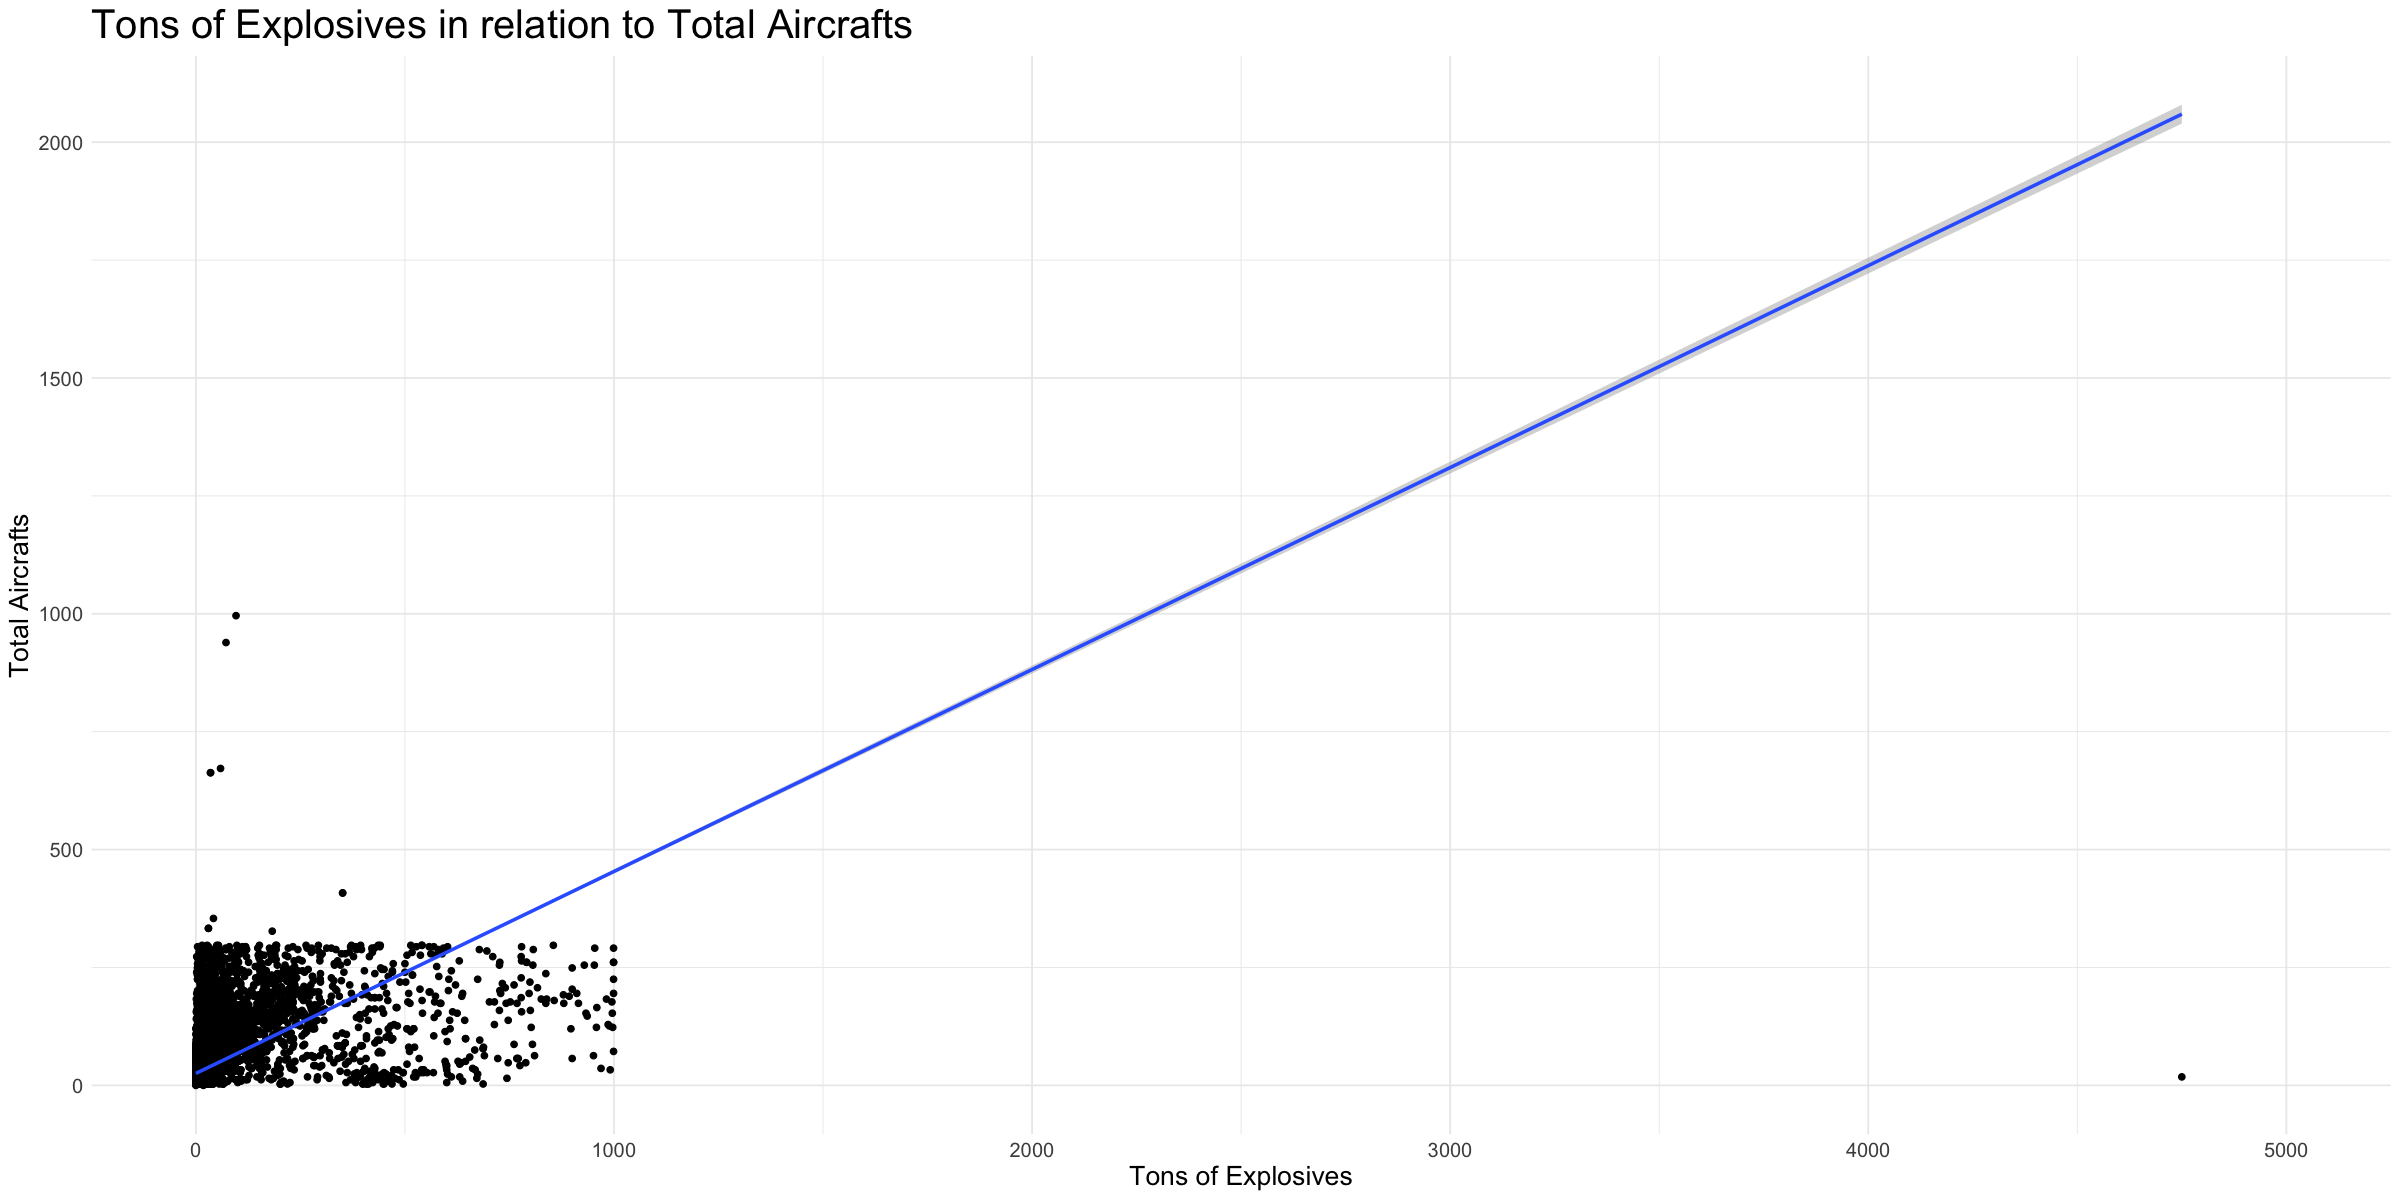

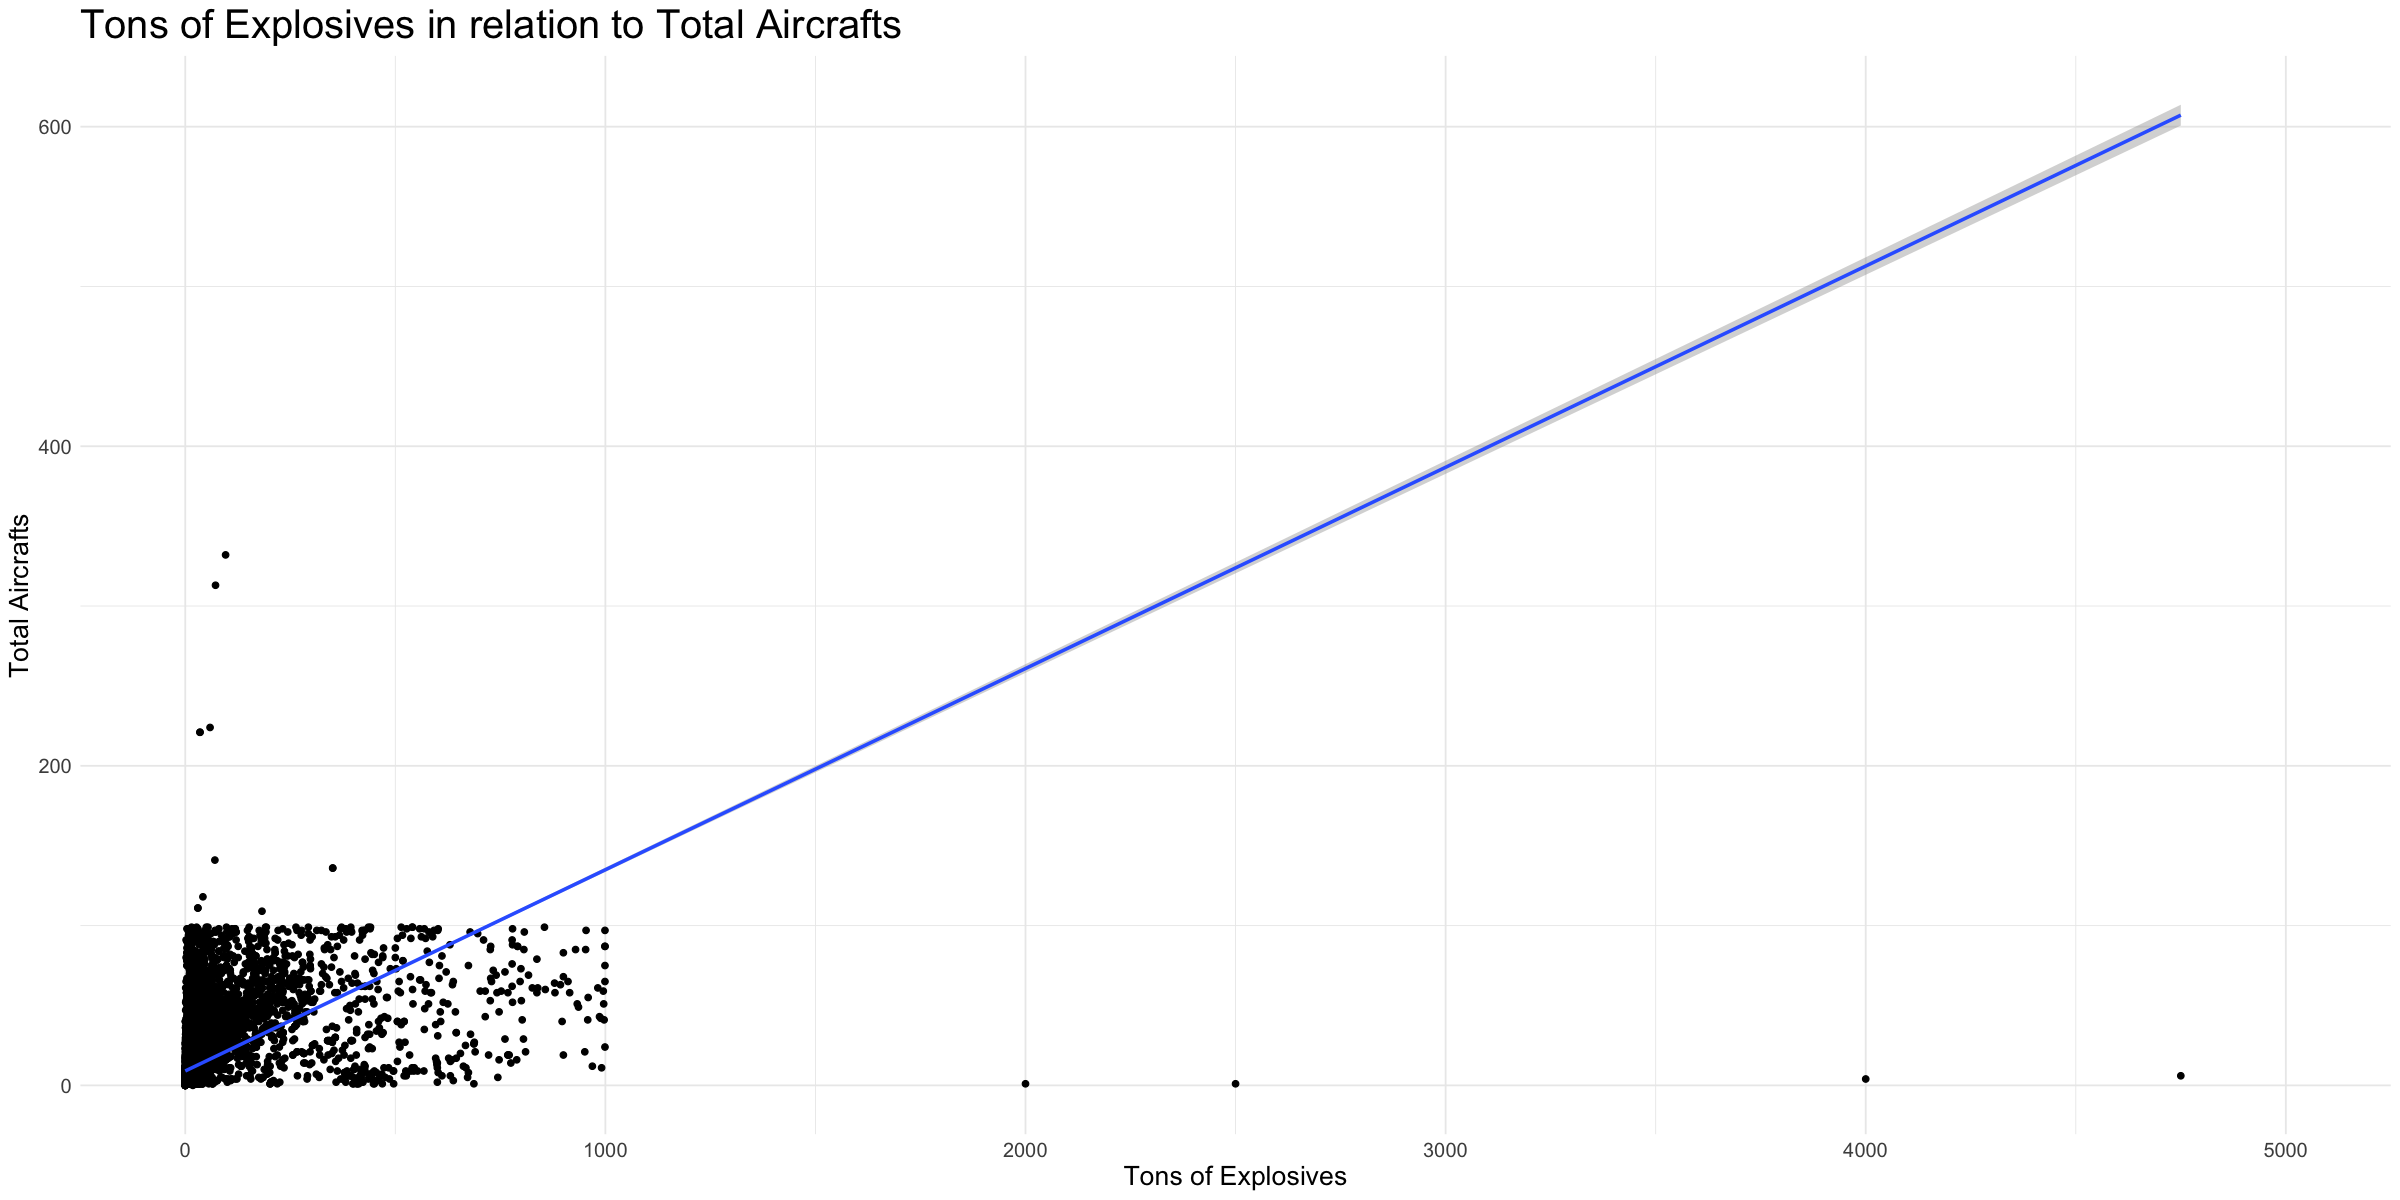

In [11]:
airops = airops %>%
    mutate(Total.Aircrafts = Airborne.Aircraft + Attacking.Aircraft + Bombing.Aircraft)

print(cor(airops$Total.Aircrafts, airops$Total.Weight..Tons., use = "complete.obs"))

options(repr.plot.width = 20, repr.plot.height = 10)
ggplot(airops, aes(x = Total.Weight..Tons., y = Total.Aircrafts)) + 
    geom_point(show.legend = FALSE) +
    geom_smooth(method = "lm") +
    theme_minimal() +
    theme(
        plot.title = element_text(size = 24),  
        axis.title = element_text(size = 16),  
        axis.text = element_text(size = 12),   
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14)  
    ) +
    scale_x_continuous(limits = c(0, 5000)) +
    labs(title = "Tons of Explosives in relation to Total Aircrafts", x = "Tons of Explosives", y = "Total Aircrafts")


print(cor(airops$Bombing.Aircraft, airops$Total.Weight..Tons., use = "complete.obs"))

options(repr.plot.width = 20, repr.plot.height = 10)
ggplot(airops, aes(x = Total.Weight..Tons., y = Bombing.Aircraft)) + 
    geom_point(show.legend = FALSE) +
    geom_smooth(method = "lm") +
    theme_minimal() +
    theme(
        plot.title = element_text(size = 24),  
        axis.title = element_text(size = 16),  
        axis.text = element_text(size = 12),   
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14)  
    ) +
    scale_x_continuous(limits = c(0, 5000)) +
    labs(title = "Tons of Explosives in relation to Total Aircrafts", x = "Tons of Explosives", y = "Total Aircrafts")

It's hard to say anything about a correlation between those two variables. On the one hand, there seems to be about a numerical correlation of 0.6 approx, but on the other hand, there also seems to be a sort of "limit" to the known data, somewhere around 1000 tons of total weight of explosives and also at around 300 aircrafts involved. As a result, maybe the correlation we find can be highly biased due to this unseen effect that prevents us from having complete information of the number of aircrafts above 300 or the weight of the explosives above 1000 tons.

### <font color=red>5. Create a visualisation of the timeline of aerial bombing operations. Group the mission months for all WW2 missions and show the total number of bombings from the onset to the end of WW2. What do you observe?</font>

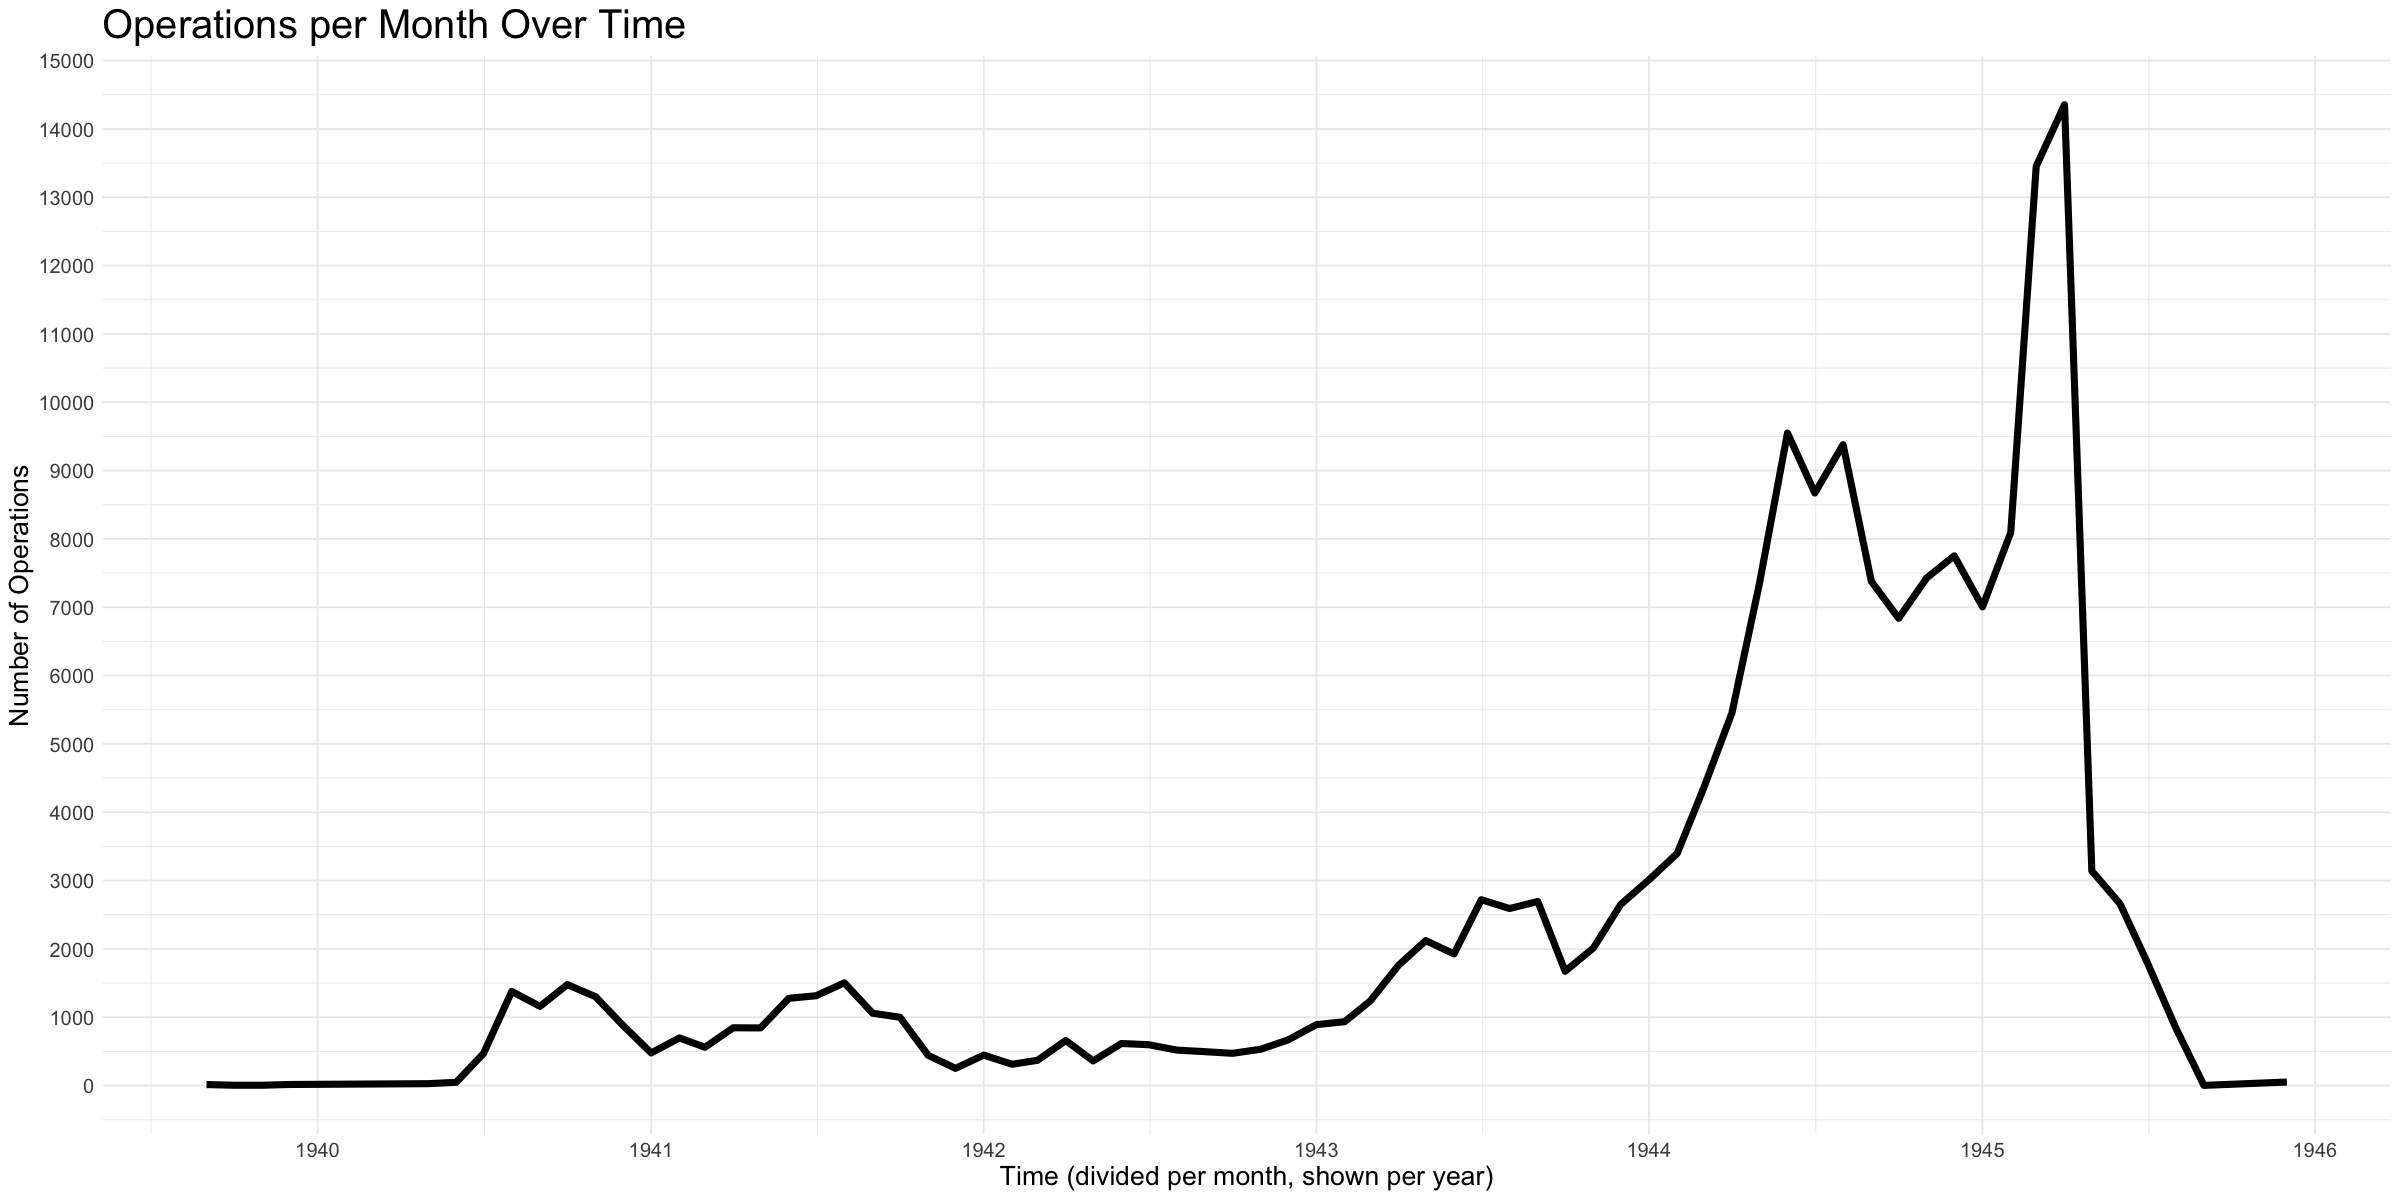

In [12]:
ops_per_month = airops %>% 
    group_by(Mission.Date.Year_Month) %>% 
    count()

ops_per_month$Mission.Date.Year_Month = as.Date(paste0(ops_per_month$Mission.Date.Year_Month, "-01"), format="%Y-%m-%d")

#print(complete_ops_per_month)

options(repr.plot.width = 20, repr.plot.height = 10)
ggplot(ops_per_month, aes(x = Mission.Date.Year_Month, y = n)) +
    geom_line(lwd = 2) +
    labs(x = "Time (divided per month, shown per year)", y = "Number of Operations", title = "Operations per Month Over Time") +
    scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
    scale_y_continuous(breaks = seq(0, 15000, by = 1000)) +
    theme_minimal() +
    theme(
        plot.title = element_text(size = 24),  
        axis.title = element_text(size = 16),  
        axis.text = element_text(size = 12),   
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14)  
    )

In the same lines as we saw previously, we can observe how there is a sharp increase of the amount of operations during 1944 and 1945. As we commented earlier, the fact that the war ended in the middle of 1945 influenced the data we saw before with division by year. The most fierce year seemed to be 1944 in exercise 1, but now upon closer inspection we can see that actually the months with the most operations were the first months of 1945, just before the war started to greatly favor the Allied side.

The efforts to win the war probably were intensified during the decisive points in 1944 and 1945, when the most decisive battles took place and, ultimately, led to the victory from the Allied side, which is the side of those specific records.

### <font color=red>6. Does bombing increase for a specific period and for what theater?</font>

### <font color=red>Create a line chart of the total bombs dropped per month during WWII for the different Theaters of operation. What patterns do you observe?</font>

In this analysis and posterior ones, I decided to use the total weight of explosives in tons because it is a column with much fewer NA values in general. There are a huge amount of operations for which there is absolutely no account of the number of individual bombs used in the operation but rather just a count of the tons of explosives dropped.

As a result, the analysis will be much more reliable and robust using the weight instead of the count of bombs.

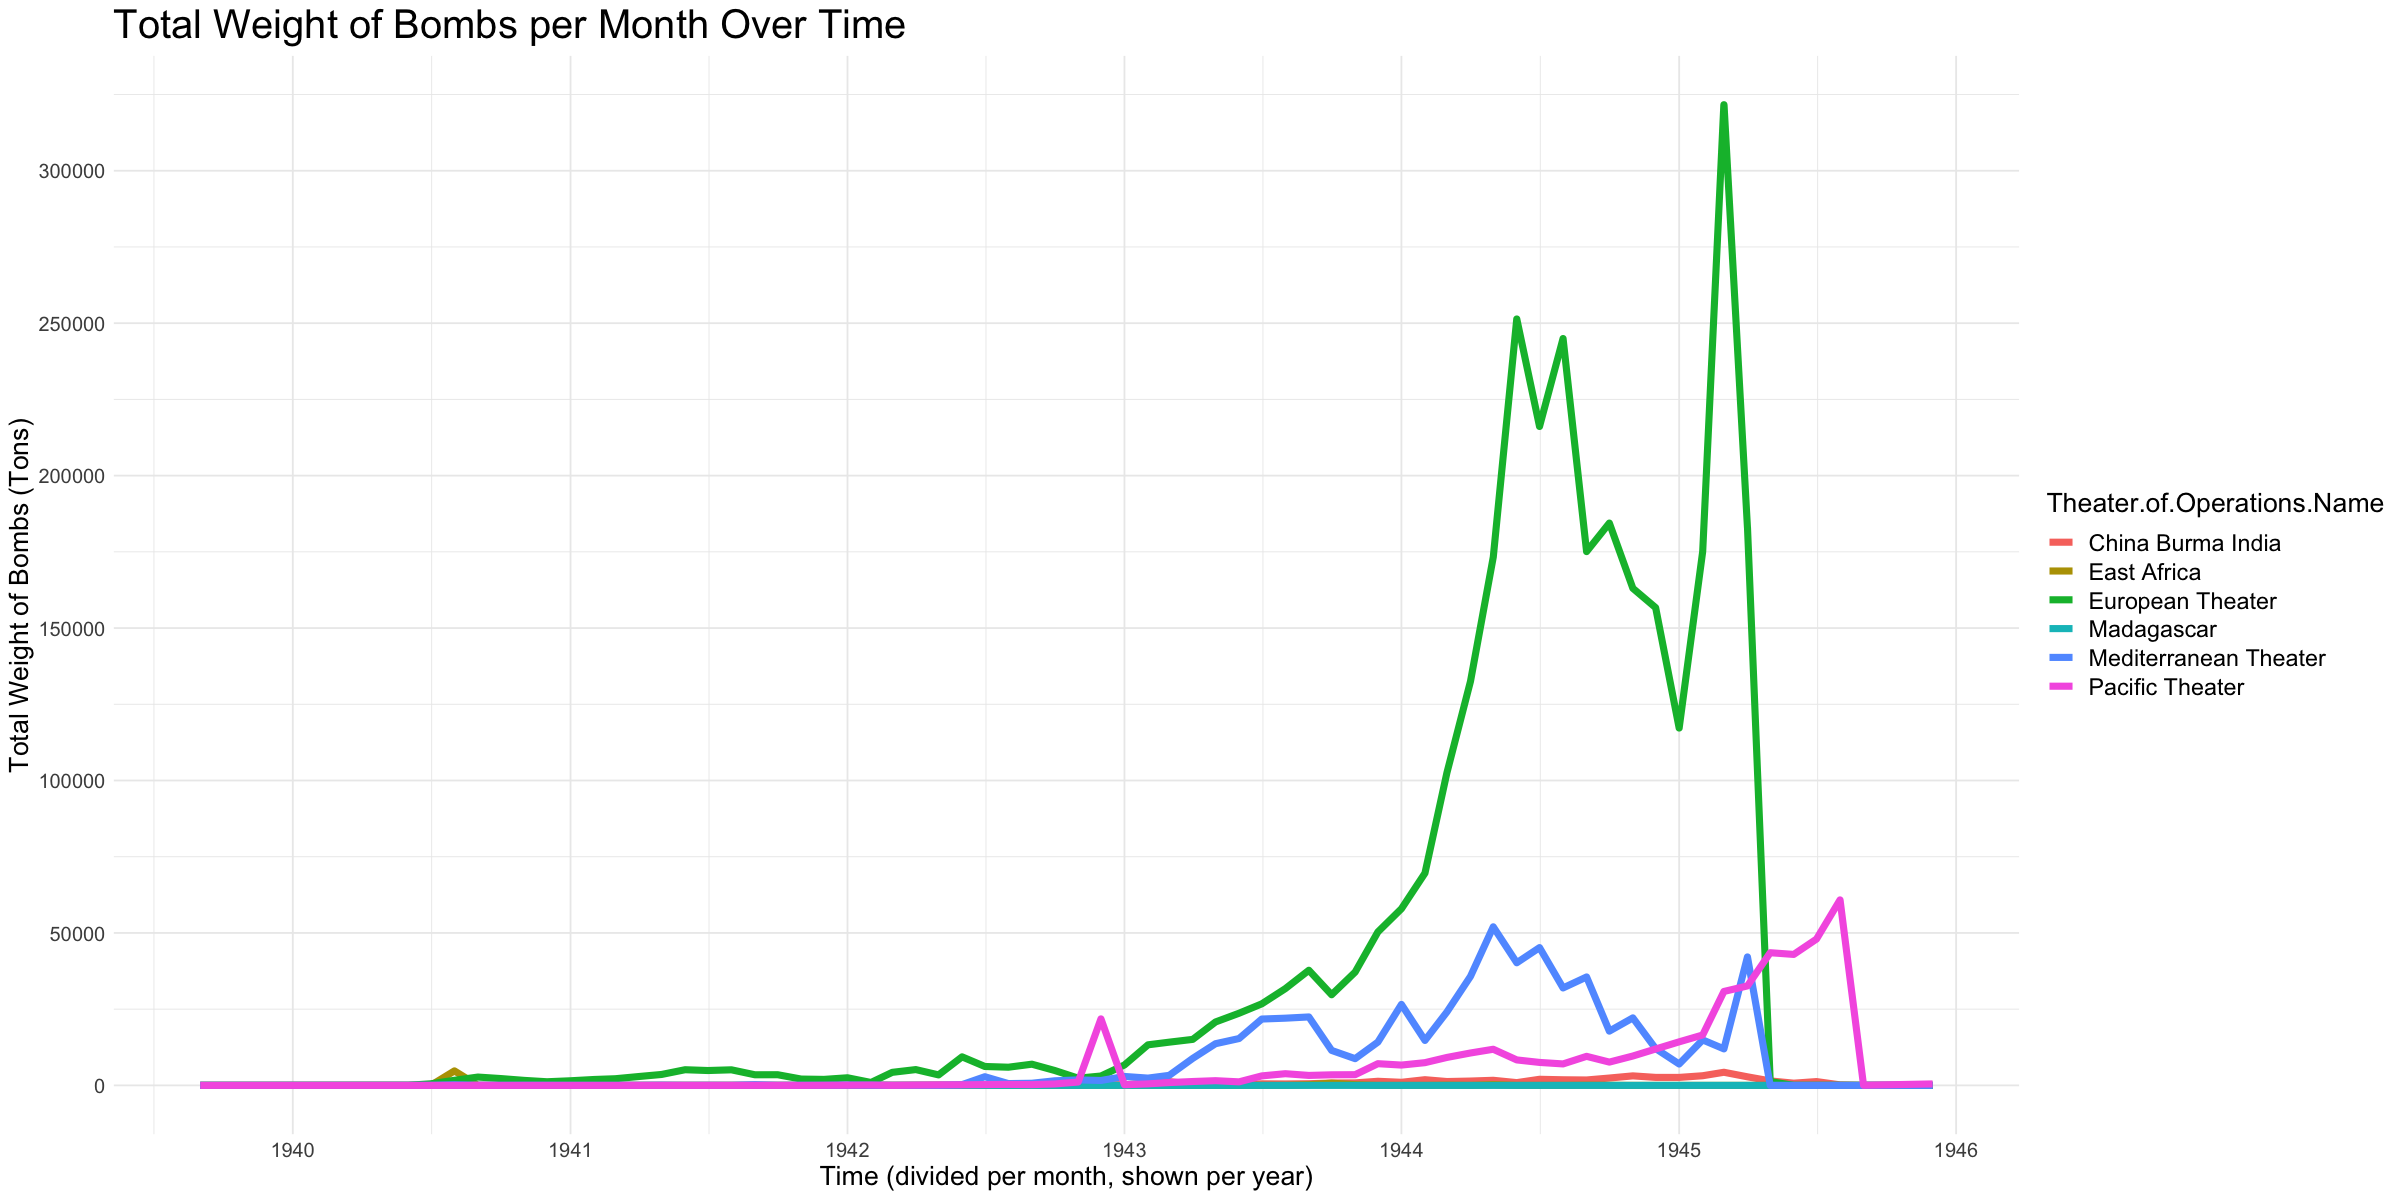

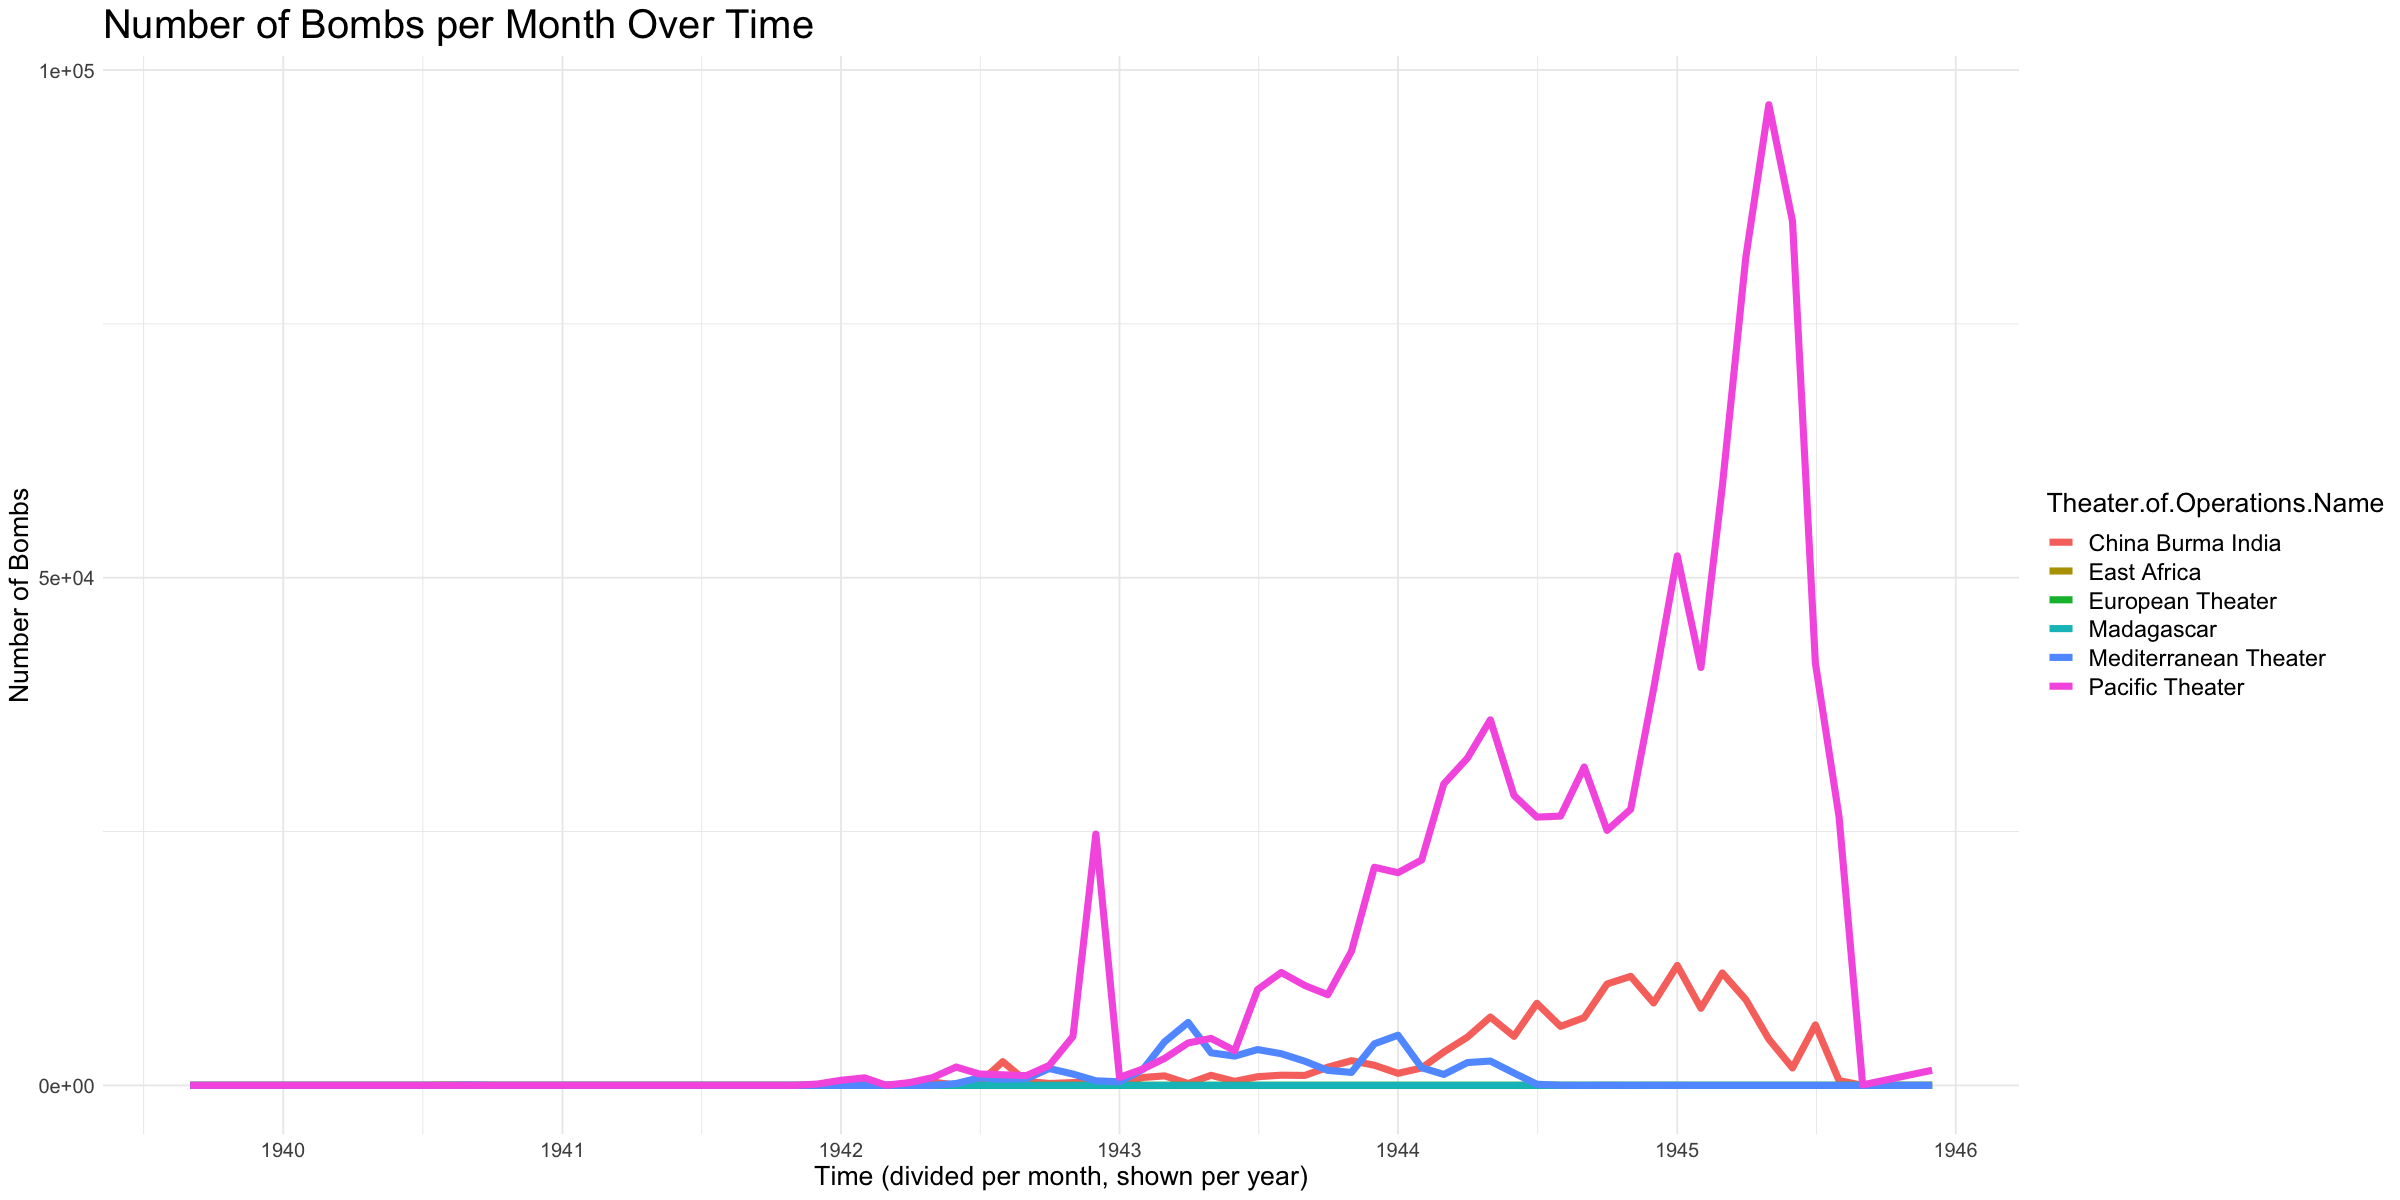

In [13]:
airops$Mission.Date.Year_Month = as.Date(paste0(airops$Mission.Date.Year_Month, "-01"), format="%Y-%m-%d")

bombs_per_month = airops %>%
    filter(Theater.of.Operations.Name != "Unknown") %>%
    group_by(Theater.of.Operations.Name, Mission.Date.Year_Month) %>%
    summarise(total_bombs = sum(Total.Weight..Tons., na.rm = TRUE), .groups = 'drop') %>%
    complete(Theater.of.Operations.Name, Mission.Date.Year_Month, fill = list(total_bombs = 0))

#airops$Mission.Date.Year_Month = as.Date(paste0(airops$Mission.Date.Year_Month, "-01"), format="%Y-%m-%d")

options(repr.plot.width = 20, repr.plot.height = 10)
ggplot(bombs_per_month, aes(x = Mission.Date.Year_Month, y = total_bombs, color = Theater.of.Operations.Name)) +
    geom_line(lwd = 2) +
    labs(x = "Time (divided per month, shown per year)", y = "Total Weight of Bombs (Tons)", title = "Total Weight of Bombs per Month Over Time") +
    scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
    scale_y_continuous(breaks = seq(0, 1500000, by = 50000)) +
    scale_fill_manual(values = Guillems_accessible_palette) +
    theme_minimal() +
    theme(
        plot.title = element_text(size = 24),  
        axis.title = element_text(size = 16),  
        axis.text = element_text(size = 12),   
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14)  
    )

#airops$Mission.Date.Year_Month = as.Date(paste0(airops$Mission.Date.Year_Month, "-01"), format="%Y-%m-%d")

bombs_per_month = airops %>%
    filter(Theater.of.Operations.Name != "Unknown") %>%
    group_by(Theater.of.Operations.Name, Mission.Date.Year_Month) %>%
    summarise(total_bombs = sum(High.Explosives, na.rm = TRUE), .groups = 'drop') %>%
    complete(Theater.of.Operations.Name, Mission.Date.Year_Month, fill = list(total_bombs = 0))

#airops$Mission.Date.Year_Month = as.Date(paste0(airops$Mission.Date.Year_Month, "-01"), format="%Y-%m-%d")

options(repr.plot.width = 20, repr.plot.height = 10)
ggplot(bombs_per_month, aes(x = Mission.Date.Year_Month, y = total_bombs, color = Theater.of.Operations.Name)) +
    geom_line(lwd = 2) +
    labs(x = "Time (divided per month, shown per year)", y = "Number of Bombs", title = "Number of Bombs per Month Over Time") +
    scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
    scale_y_continuous(breaks = seq(0, 1500000, by = 50000)) +
    scale_fill_manual(values = Guillems_accessible_palette) +
    theme_minimal() +
    theme(
        plot.title = element_text(size = 24),  
        axis.title = element_text(size = 16),  
        axis.text = element_text(size = 12),   
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14)  
    )

We can observe, in some way, how the war evolved. The most intense battles took place in Europe and the Mediterranean, but after the defeat of the Axis Powers in April-May, the bombing operations stopped abruptly.

After that point, the only operations which kept taking place were the operations against Japan, which continued until the nuclear bombings of Hiroshima and Nagasaki, in August. After that, the peace talks started and, as a result, the bombing operations also stopped abruptly at that point.

For comparison, below there is the same chart but with the High.Explosives count column used instead. We can clearly see how the results only match a very biased approach due to the fact that there are a huge amount of NA values for that column. 

### <font color=red>7. The end-game: damage assessment between 1944-1945.</font>

### <font color=red>It is estimated that between 1944 to 1945, an average of 13K civilians were killed every month 400,000 by Allied carpet bombings. But German cities were not the only target of Allies’ strategic bombing. Create a density plot to show the distribution of High Explosives Weight (in Tons), as a function of target priority, for the window between 1944-1945. What patterns do you observe?</font>

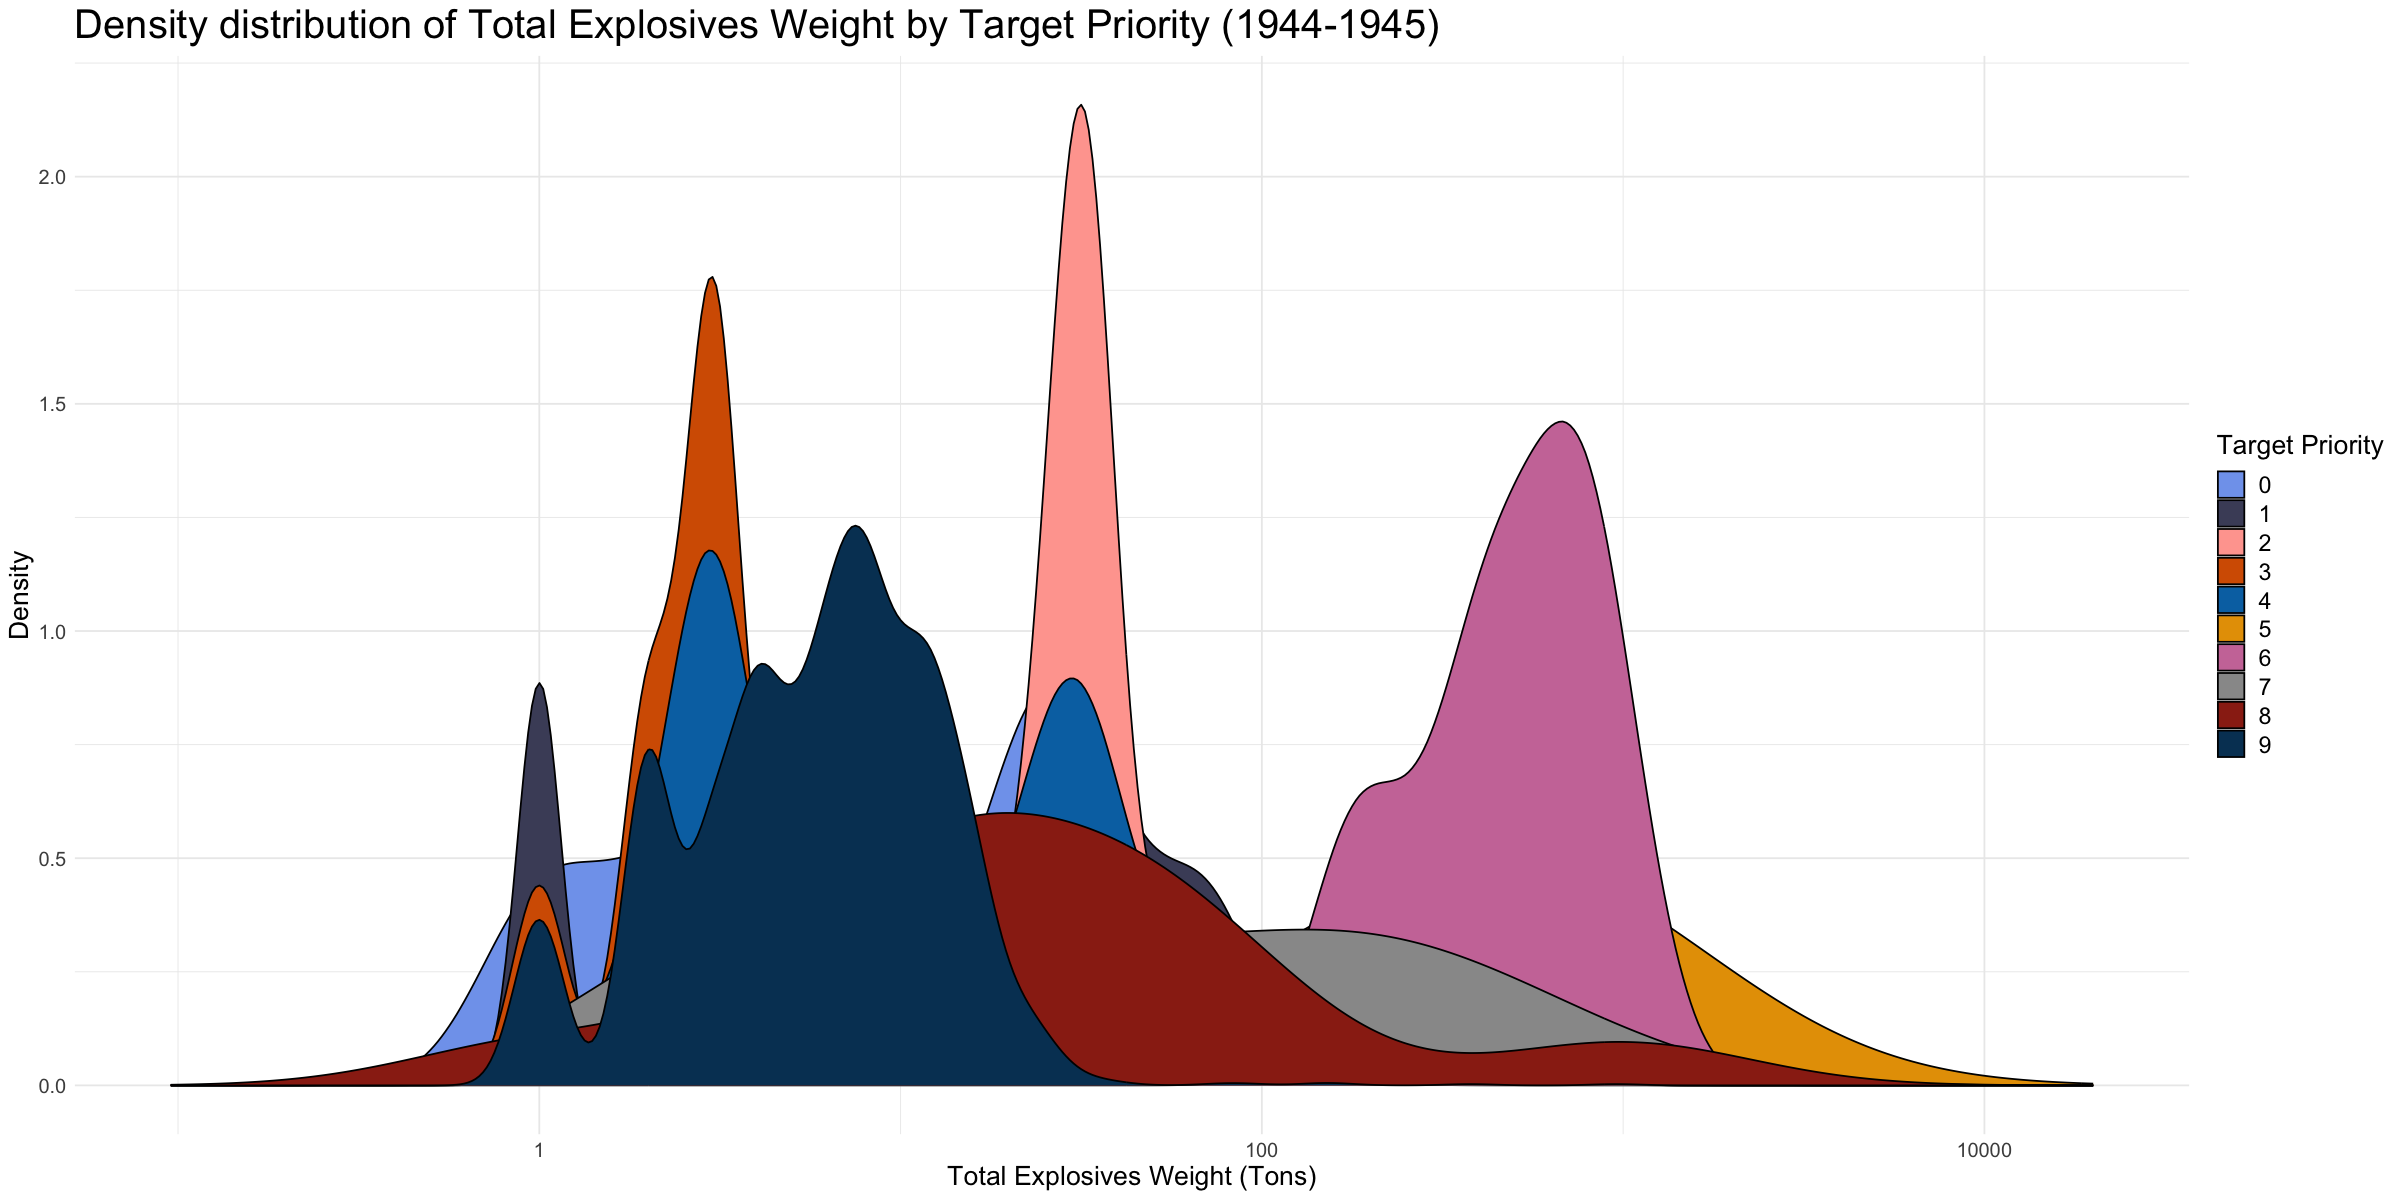

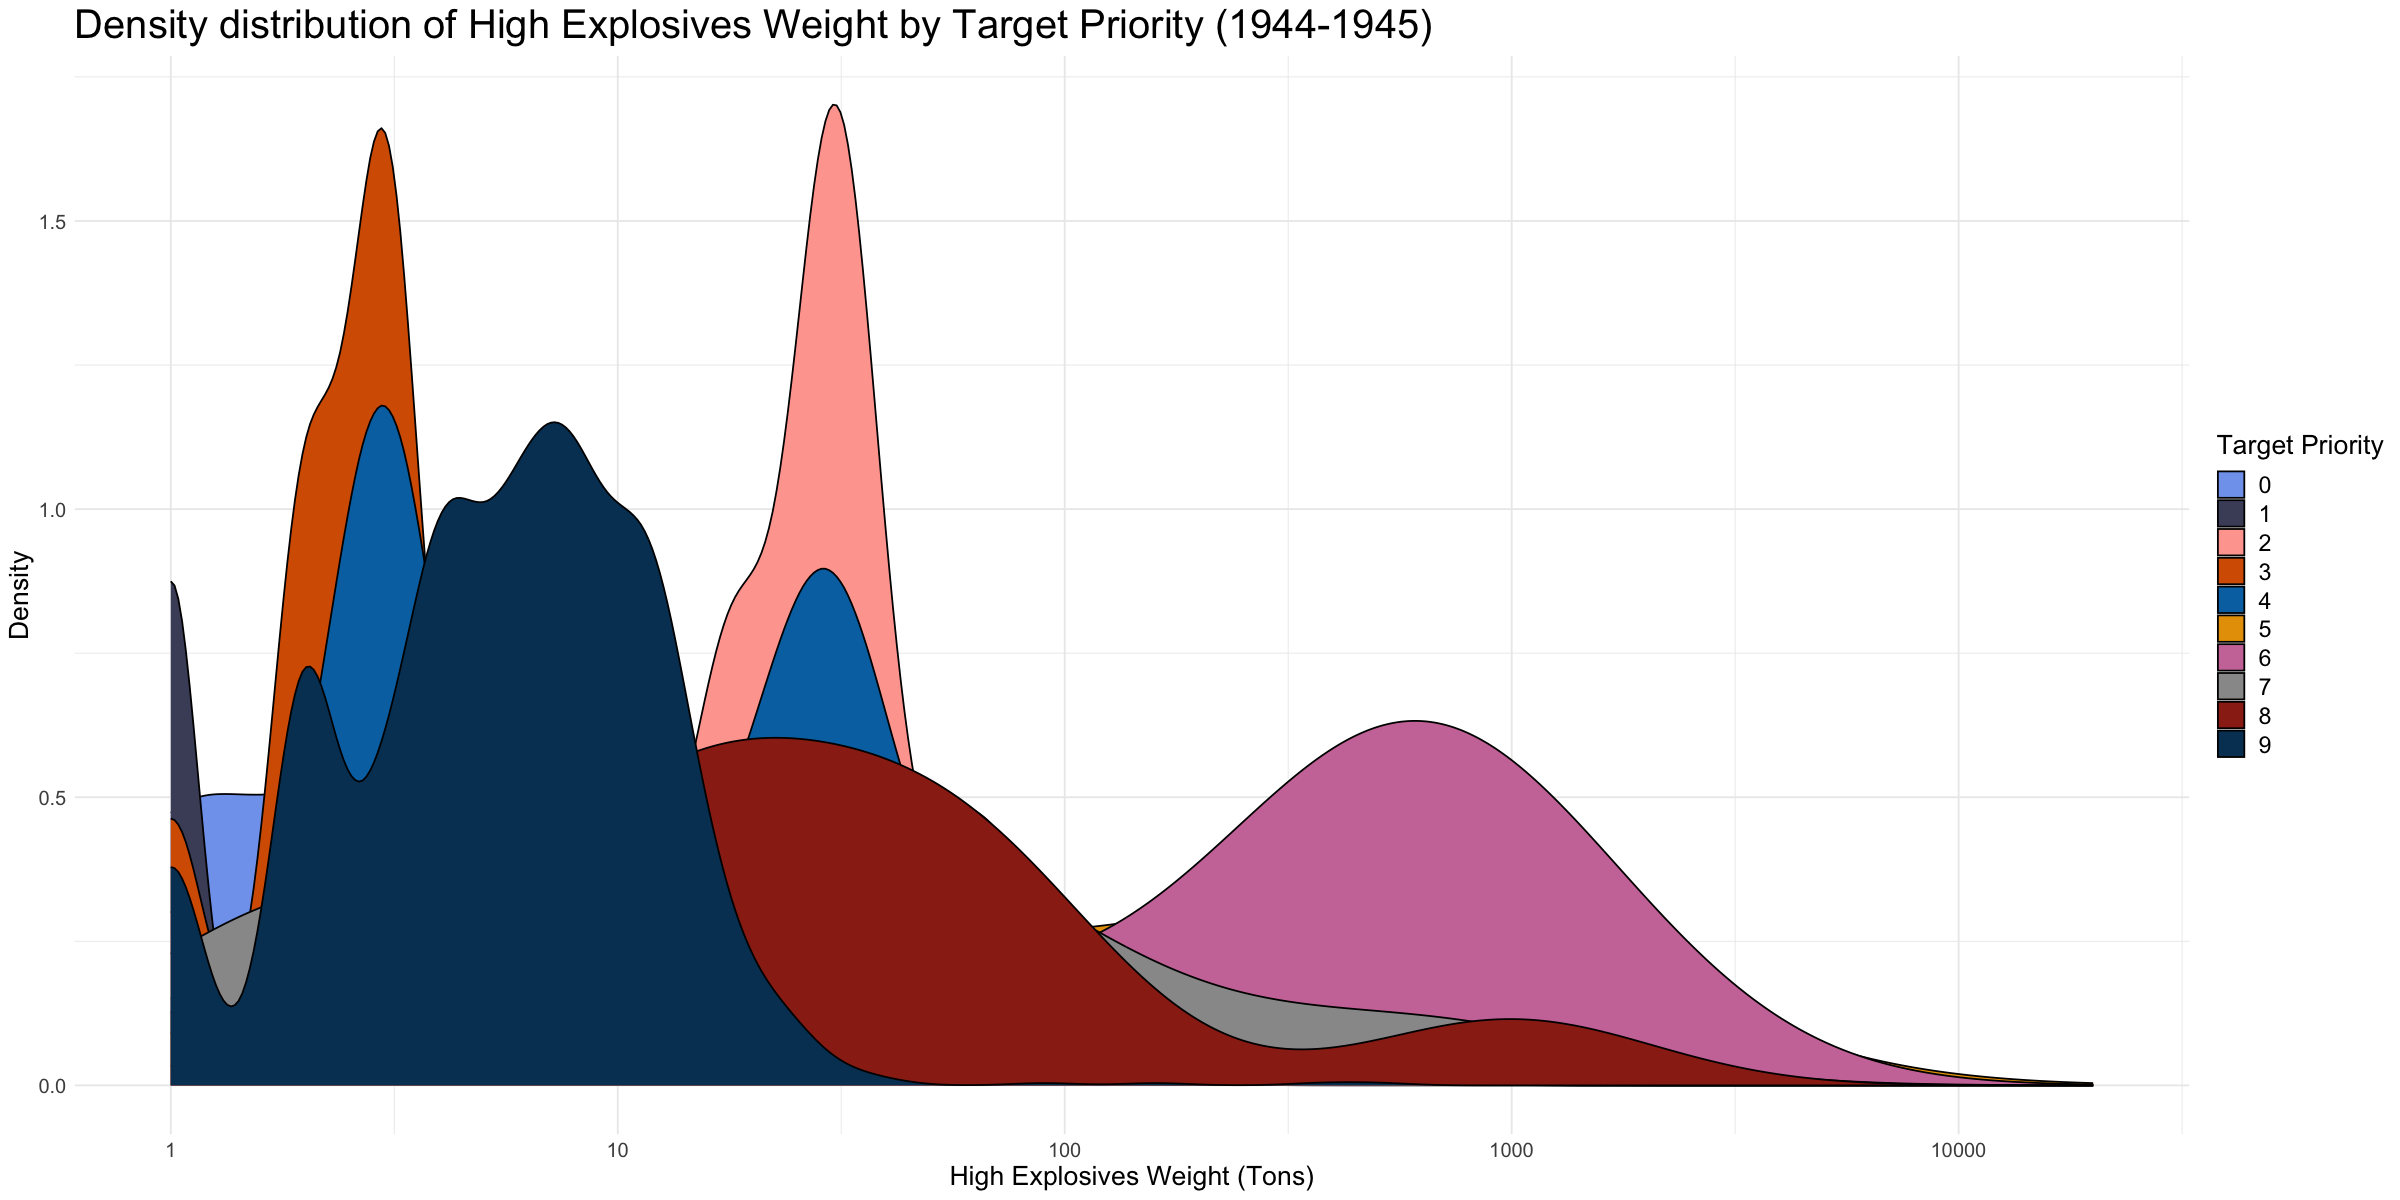

In [14]:
ops_44_45 = airops %>% 
    filter(Mission.Date.Year == '1944'| Mission.Date.Year == '1945') %>%
    filter(Target.Priority != '' & Target.Priority != 'P' & Target.Priority != 'A' & Target.Priority != 'O')

ggplot(ops_44_45, aes(x = Total.Weight..Tons., fill = factor(Target.Priority))) +
    geom_density(alpha = 1, na.rm = TRUE) +
    labs(title = "Density distribution of Total Explosives Weight by Target Priority (1944-1945)",
        x = "Total Explosives Weight (Tons)", y = "Density", fill = "Target Priority") +
    theme_minimal() +
    theme(legend.position = "right") +
    scale_x_log10() +
    scale_fill_manual(values = Guillems_accessible_palette_2) +
    theme(
        plot.title = element_text(size = 24),  
        axis.title = element_text(size = 16),  
        axis.text = element_text(size = 12),   
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14)  
    )

ops_44_45 = airops %>% 
    filter(Mission.Date.Year == '1944'| Mission.Date.Year == '1945') %>%
    filter(Target.Priority != '' & Target.Priority != 'P' & Target.Priority != 'RNAS' & Target.Priority != 'SAAF')

ggplot(ops_44_45, aes(x = High.Explosives.Weight..Tons., fill = factor(Target.Priority))) +
    geom_density(alpha = 1, na.rm = TRUE) +
    labs(title = "Density distribution of High Explosives Weight by Target Priority (1944-1945)",
        x = "High Explosives Weight (Tons)", y = "Density", fill = "Target Priority") +
    theme_minimal() +
    theme(legend.position = "right") +
    scale_x_log10() +
    scale_fill_manual(values = Guillems_accessible_palette_2) +
    theme(
        plot.title = element_text(size = 24),  
        axis.title = element_text(size = 16),  
        axis.text = element_text(size = 12),   
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14)  
    )

The first thing we can see is that the high explosives weight is very skewed to the right, thus the log10 scale for the x axis.

We can also observe how the densities of higher priority targets are centered around 10-100 tons of high explosives weight. This means that the operations for these objectives (priorities 7, 8 and 9) usually carried 10 to 100 tons of explosives, which is way less than the highest peak of operations on targets with priority 6. In order to assess what caused this we should delve deeper into analysing the key differences between each type of operation (low, mid and high priority targets). As this is a density distribution,it could very well be that the operations tended to drop a smaller amount of high explosives each time but that there were a lot more operations in total numbers.

We can also see that bombing operations on targets with priorities 2 and 3 seem to have very specific weights of the high explosives used in them, but that could be due to a reduced amount of these types of operations. We should also look deeper into this category to assess that.

Continuing with the argument from before, here if instead of high explosives weight we use the total weight of the explosives used, we can see how some of the distributions change a bit and even see a patron emerging, as now targets of priority 5 seem to be the ones which had the highest amount of explosives dropped on, for some reason that we could also focus on exploring.

### <font color=red>8. What is the most common number of bombs dropped per mission? To address this question, create a histogram of the number of bombs dropped per mission.</font>

[1] 0
[1] 20000


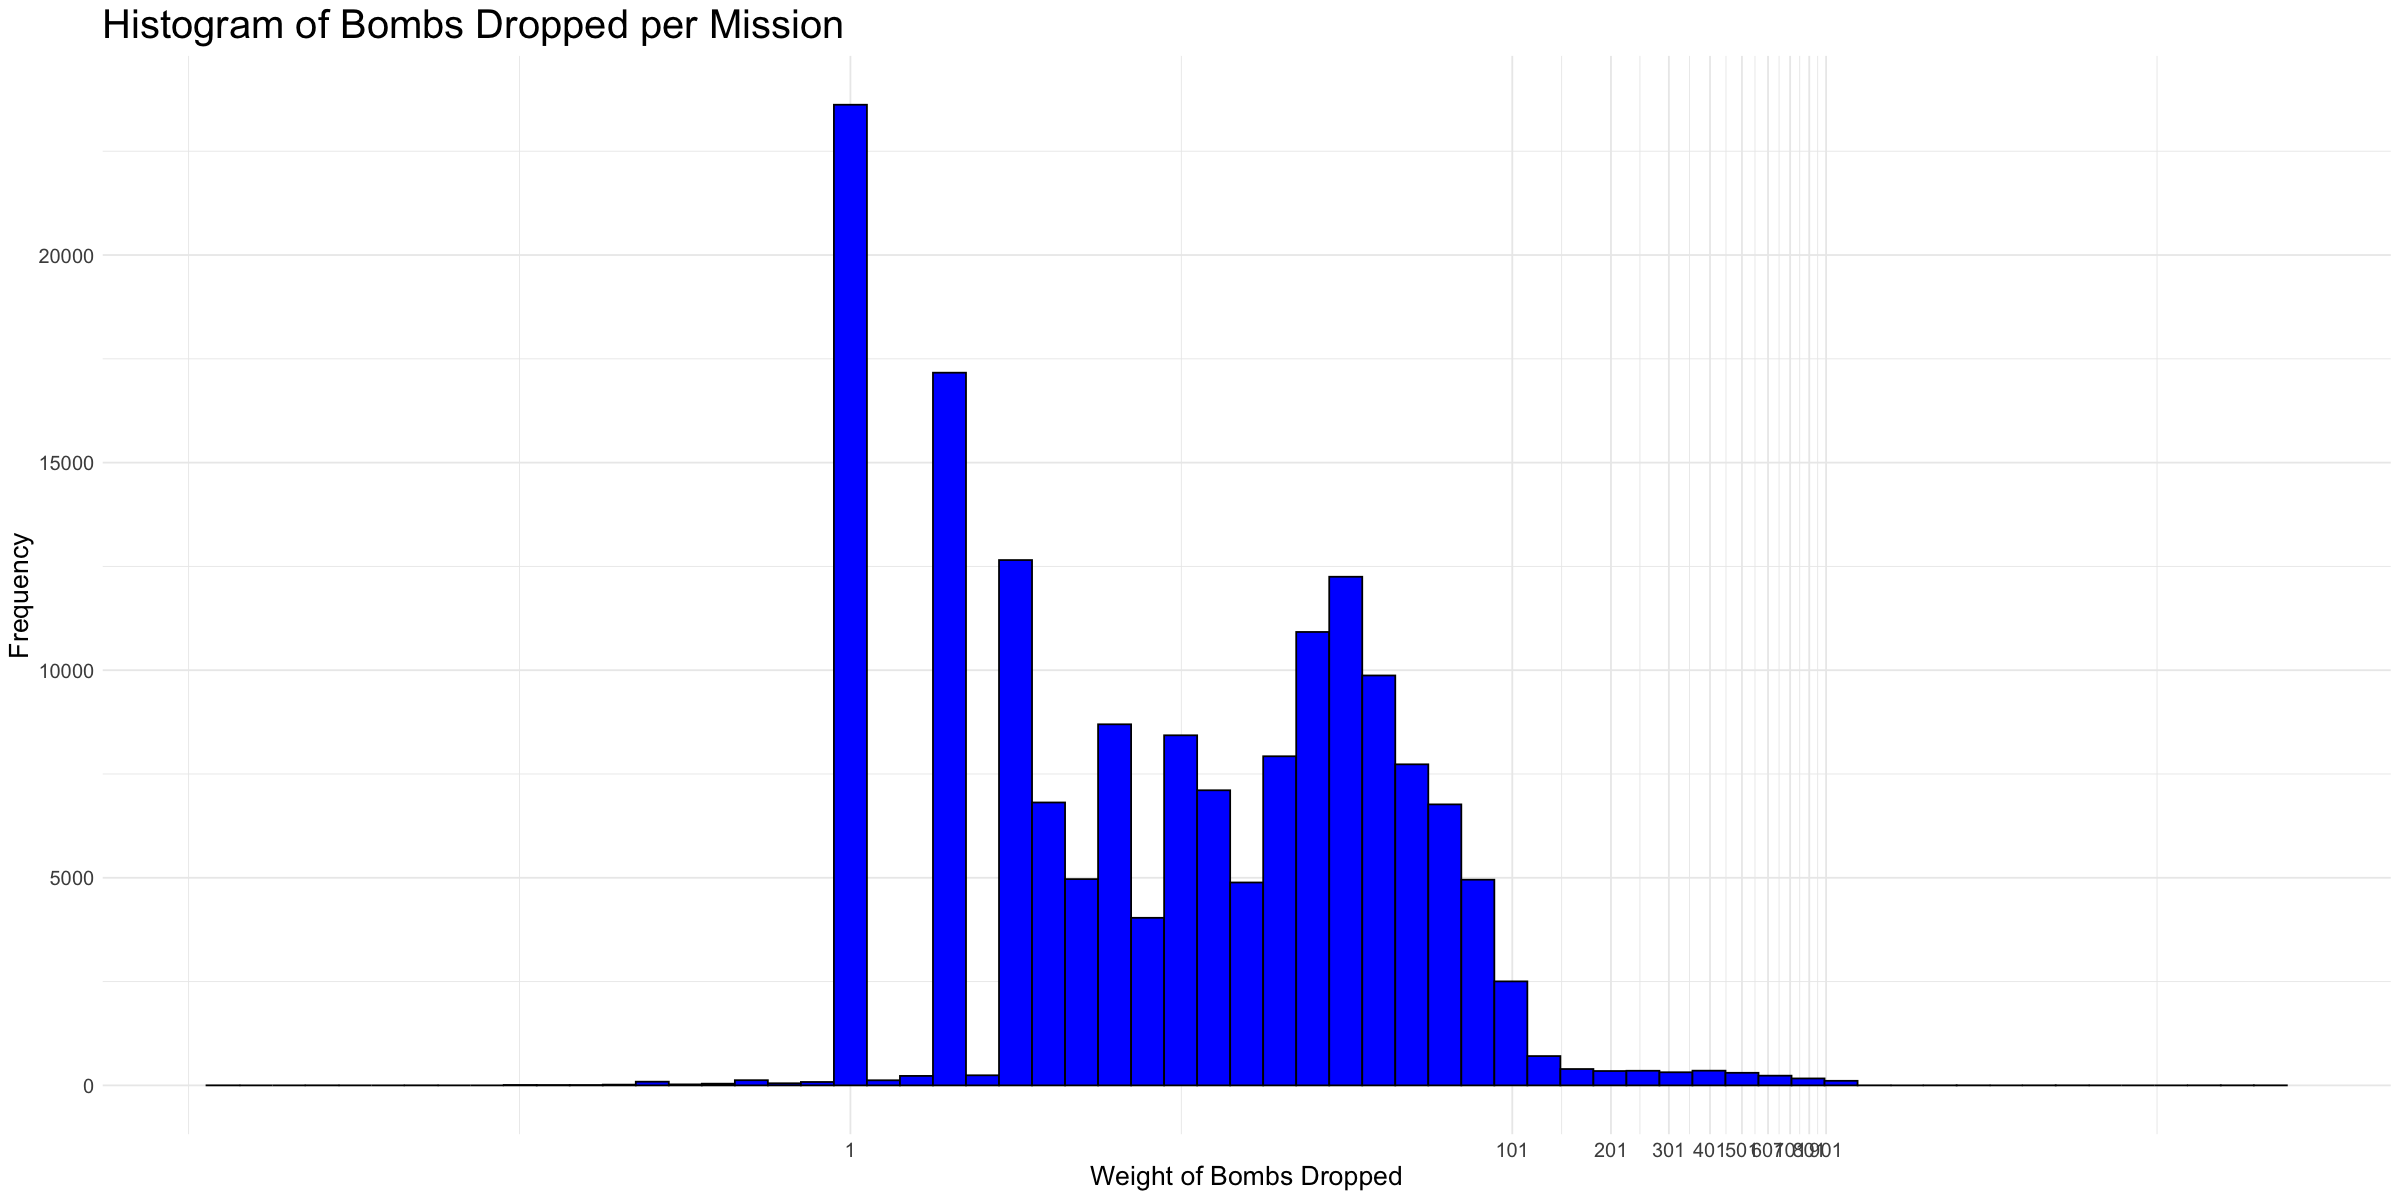

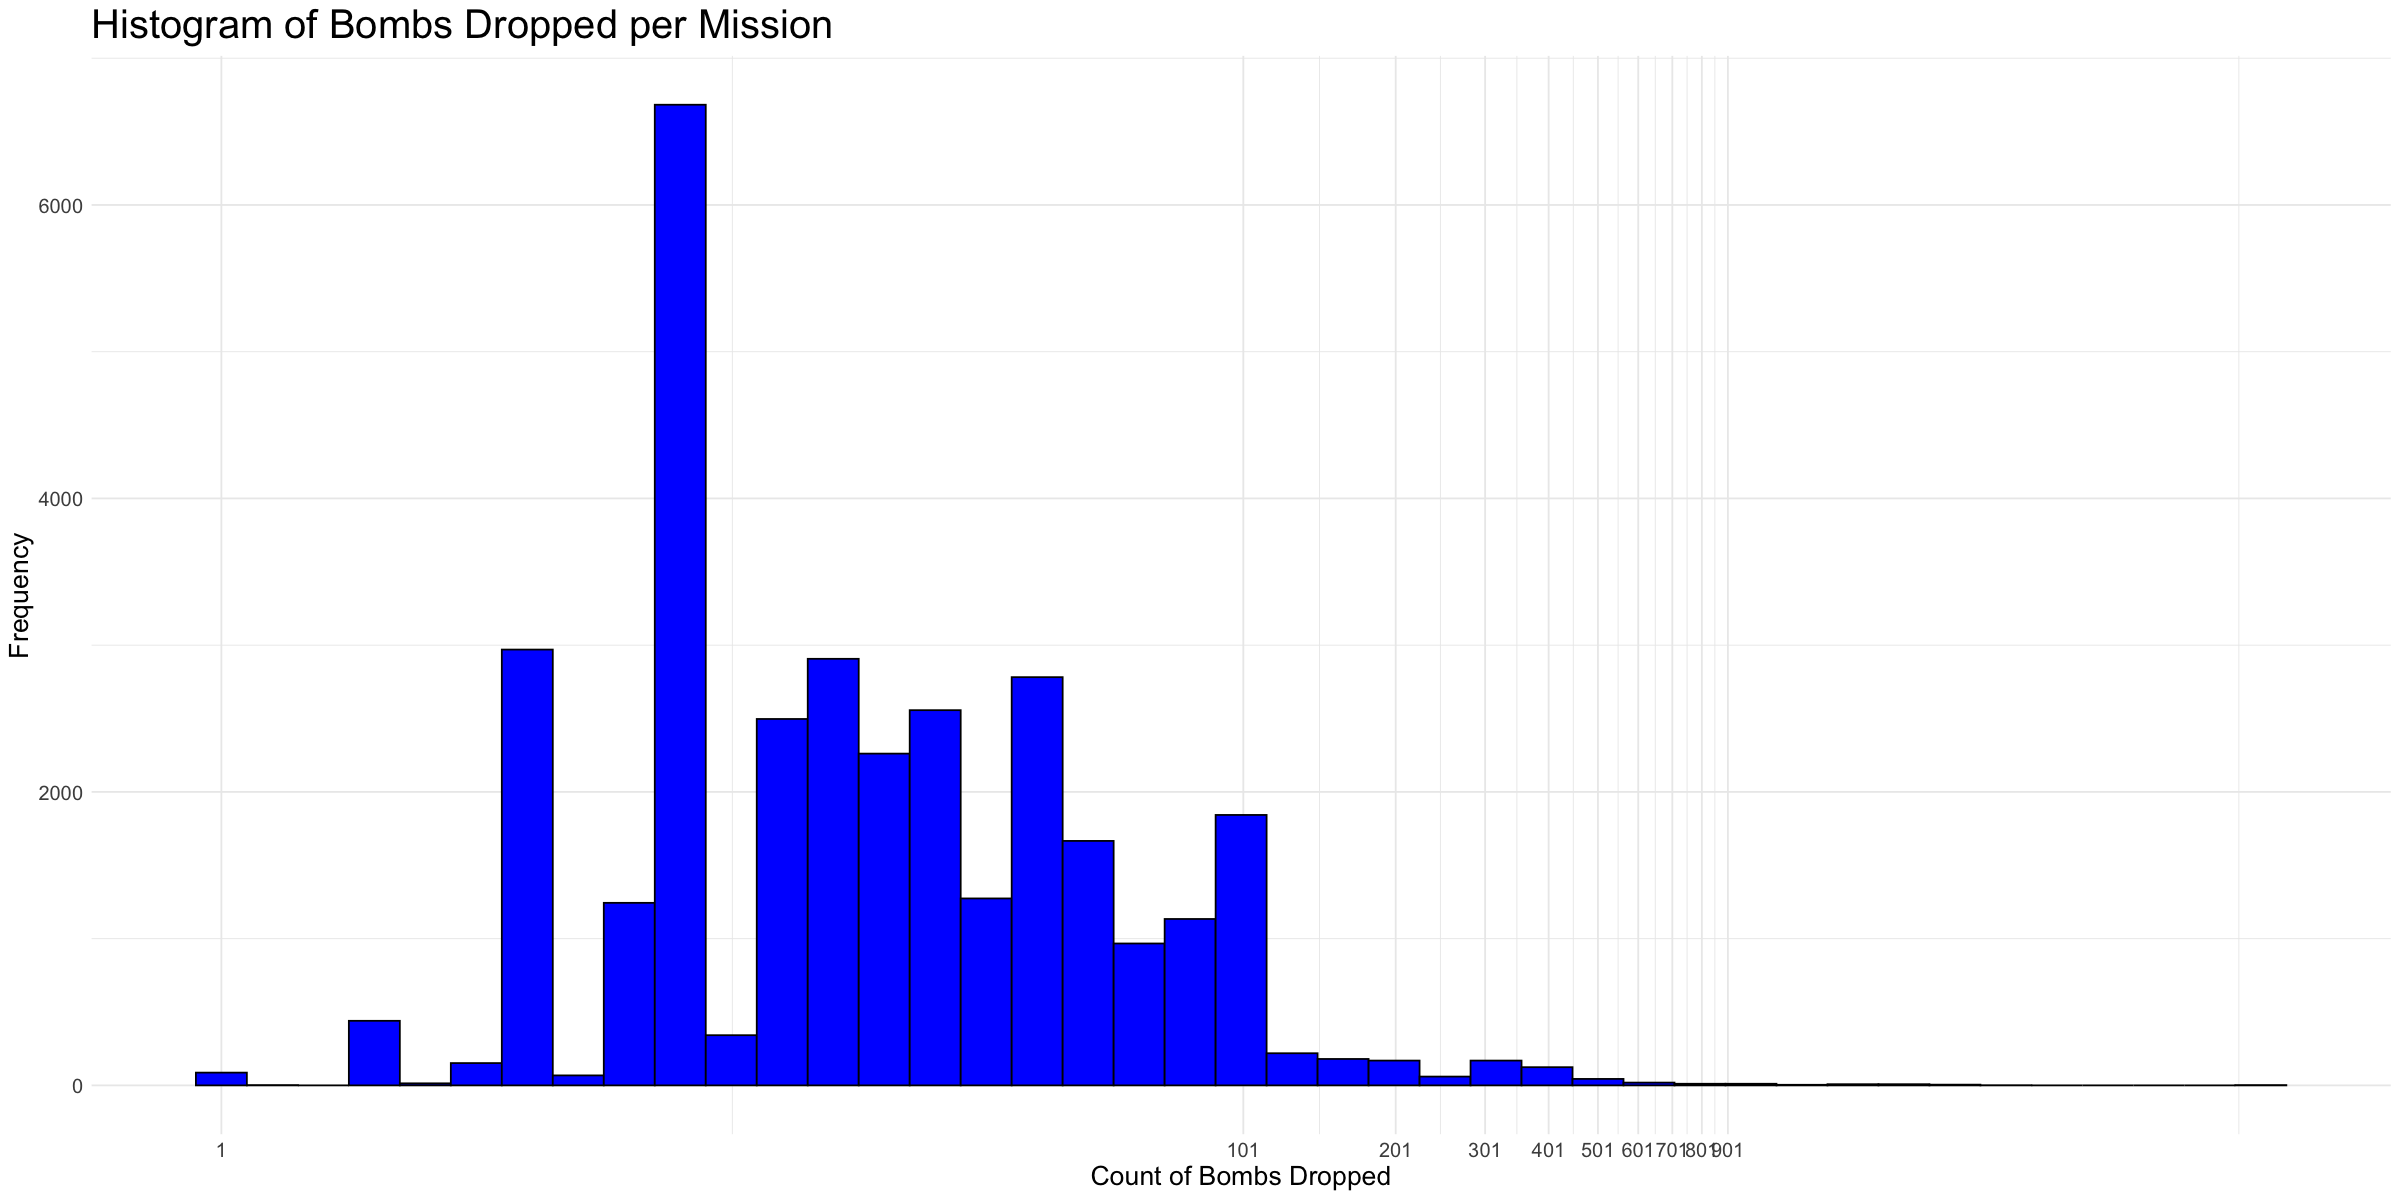

In [15]:
print(min(airops$Total.Weight..Tons., na.rm = TRUE))
print(max(airops$Total.Weight..Tons., na.rm = TRUE))

ggplot(airops, aes(x = Total.Weight..Tons.)) +
    geom_histogram(binwidth = 0.1, color = "black", fill = "blue") + 
    labs(title = "Histogram of Bombs Dropped per Mission",
        x = "Weight of Bombs Dropped",
        y = "Frequency") +
    scale_x_log10(breaks = seq(1, 1000, by = 100)) +
    theme_minimal() +
    theme(
        plot.title = element_text(size = 24),  
        axis.title = element_text(size = 16),  
        axis.text = element_text(size = 12),   
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14)  
    )

ggplot(airops, aes(x = High.Explosives)) +
    geom_histogram(binwidth = 0.1, color = "black", fill = "blue") + 
    labs(title = "Histogram of Bombs Dropped per Mission",
        x = "Count of Bombs Dropped",
        y = "Frequency") +
    scale_x_log10(breaks = seq(1, 1000, by = 100)) +
    theme_minimal() +
    theme(
        plot.title = element_text(size = 24),  
        axis.title = element_text(size = 16),  
        axis.text = element_text(size = 12),   
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14)  
    )

In the graph, as we used a log10 scale once again to improve readibility, we cannot say with 100% accuracy which values pertain to each bin, but we can be quite sure that the most usual single value for the amount of tons of explosives dropped is 1 (probably between 0 and 1, as the bin is single).

If we were to only use the count of bombs dropped, we could argue that the most usual count could be happening between 30 and 40 bombs, but we already saw that it is a column with a big amount of NA values so this approach has to be taken with a pinch of salt.